**<font size="8">Baseball Case Study**

**Problem Statement:**

Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

In [6]:
#Importing required libraries
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [7]:
df=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


As by looking at our dataset which seems to be small due to the columns not being decriptive.We will take help from the Wikipedia link that was provided to get further insights on our dataset during it's analysis process.However,in the problem statement itself we have the below information given to us.

**-** Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors
 
**-** Output: Number of predicted wins (W)

**<font size="8"> Exploratory Data Analysis (EDA)**

In [8]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Here we have listed all the column names present in our data that is not making much sense and will need deciphering to be converted into understandable format.

**Batting statistics:**<br>

**-** vR – Runs scored: number of times a player crosses home plate<br>
**-** AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction<br>
**-** H – Hit: reaching base because of a batted, fair ball without error by the defense<br>
**-** 2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error<br>
**-** 3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error<br>
**-** HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error<br>
**-** BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.<br>
**-** K – Strike out (also abbreviated SO): number of times that a third strike is taken or swung at and missed, or bunted foul. Catcher must catch the third strike or batter may attempt to run to first base.<br>

**Pitching statistics:**  <br>

**-** W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work (also related: winning percentage)<br>
**-** RA – Run average: number of runs allowed times nine divided by innings pitched<br>
**-** ER – Earned run: number of runs that did not occur as a result of errors or passed balls<br>
**-** ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched<br>
**-** CG – Complete game: number of games where player was the only pitcher for their team<br>
**-** SHO – Shutout: number of complete games pitched with no runs allowed<br>
**-** SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings<br>

**Fielding statistics:**<br>
 
**-** E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result<br>

**Baserunning statistics:**<br>

**-** SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense<br>
**-** R – Runs scored: times reached home plate legally and safely<br>

In [9]:
df.rename(columns={'W' : 'Wins', 
                   'R' : 'Runs Scored', 
                  'AB' : 'At Bat', 
                   'H' : 'Hits', 
                  '2B' : 'Doubles', 
                  '3B' : 'Triples',
                  'HR' : 'Home Runs', 
                  'BB' : 'Base on Balls', 
                  'SO' : 'Strike Outs', 
                  'SB' : 'Stolen Base',
                  'RA' : 'Runs Average', 
                  'ER' : 'Earned Runs', 
                 'ERA' : 'Earned Run Average', 
                  'CG' : 'Complete Game',
                 'SHO' : 'Shut Outs', 
                  'SV' : 'Saves', 
                   'E' : 'Errors'}, 
          inplace=True)

df.head()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


<font size=3>Here we can clearly see that the "Wins" column is our target label and the remaining columns are our features that will determine and help us predicting the wins in a particular baseball game. As the target label "Wins" comprises of all continous data it makes this to be a **Regression problem!**

In [10]:
df.shape

(30, 17)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs Scored         30 non-null     int64  
 2   At Bat              30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Home Runs           30 non-null     int64  
 7   Base on Balls       30 non-null     int64  
 8   Strike Outs         30 non-null     int64  
 9   Stolen Base         30 non-null     int64  
 10  Runs Average        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Game       30 non-null     int64  
 14  Shut Outs           30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

<font size=3>In the info method we are able to take a look at the data types of our dataset columns. It shows that we have 16 columns with integer datatype and 1 column with float datatype. Since there are no object datatype present in our dataset no encoding process will be needed.

In [12]:
df.isna().sum()#.sum()

Wins                  0
Runs Scored           0
At Bat                0
Hits                  0
Doubles               0
Triples               0
Home Runs             0
Base on Balls         0
Strike Outs           0
Stolen Base           0
Runs Average          0
Earned Runs           0
Earned Run Average    0
Complete Game         0
Shut Outs             0
Saves                 0
Errors                0
dtype: int64

<font size=3>Since, we have no missing data in our dataset,so,we don't have to worry about handling missing data and can simply check for skewnewss and outlier details.

In [13]:
df.describe()

,Wins,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


<font size=3> Looking at our first column we can clearly see that all of them have 30.0 values as their count confirming no missing values 

<font size=3>Also, when we try to eye ball the other columns like mean, standard deviation, minimum values, 25% quartile, 50% quartile, 75% quartile and maximum values then they are seem to be progressing in a definite manner showing no visible abnormalities.

In [14]:
df.skew()

Wins                  0.047089
Runs Scored           1.200786
At Bat                0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Home Runs             0.516441
Base on Balls         0.158498
Strike Outs          -0.156065
Stolen Base           0.479893
Runs Average          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Game         0.736845
Shut Outs             0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

<font size=3>The acceptable range for skewness is between +/-0.5. We see columns such as Runs Scored, Hits, Runs Average, Earned Runs, Earned Run Average, Complete Game, Saves and Errors being slightly out of this range.

In [15]:
df.nunique()

Wins                  24
Runs Scored           28
At Bat                29
Hits                  29
Doubles               22
Triples               23
Home Runs             27
Base on Balls         29
Strike Outs           29
Stolen Base           27
Runs Average          30
Earned Runs           30
Earned Run Average    30
Complete Game          9
Shut Outs             12
Saves                 20
Errors                21
dtype: int64

<font size=3>Taking a look at all the unique values present in each of the columns in our dataset. It shows that there are no categorical data since even the unique numbers are large in number and cannot be segregated or combined.

<font size=8>**Visualization**

<font size=4>**Univariate Analysis**

<font size=3> **Strip Plot**

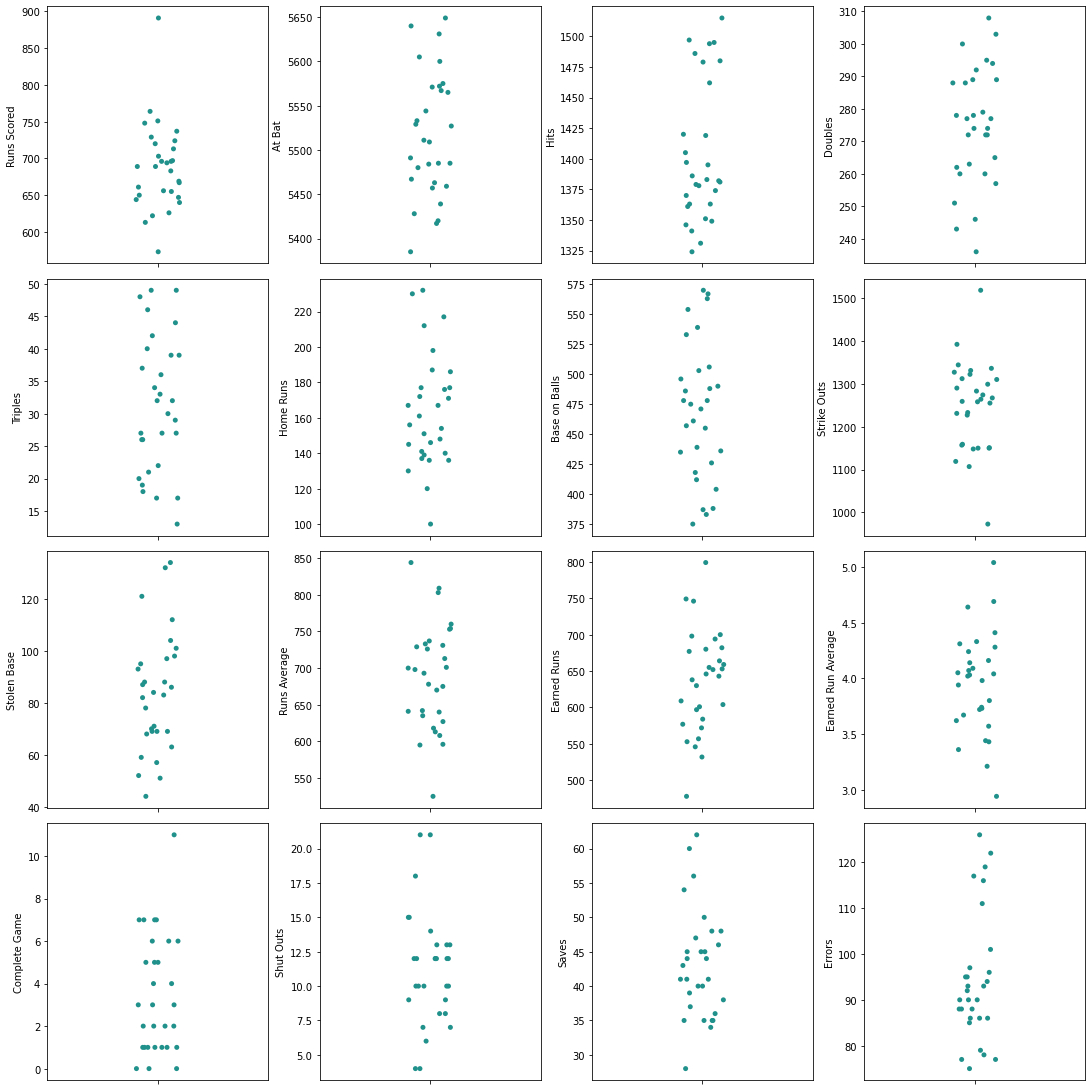

In [16]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.stripplot(y=col, data=df, ax=ax[index], palette="viridis")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

<font size=3>With the help of above strip plot we are able to take a look at data point distribution across the data set and it's range details. We can see columns Runs Scored, Strike Outs, Complete Game with single data points further away from the general accumulation indicating towards the presence of ouliers.

<font size=3> **Box Plot**

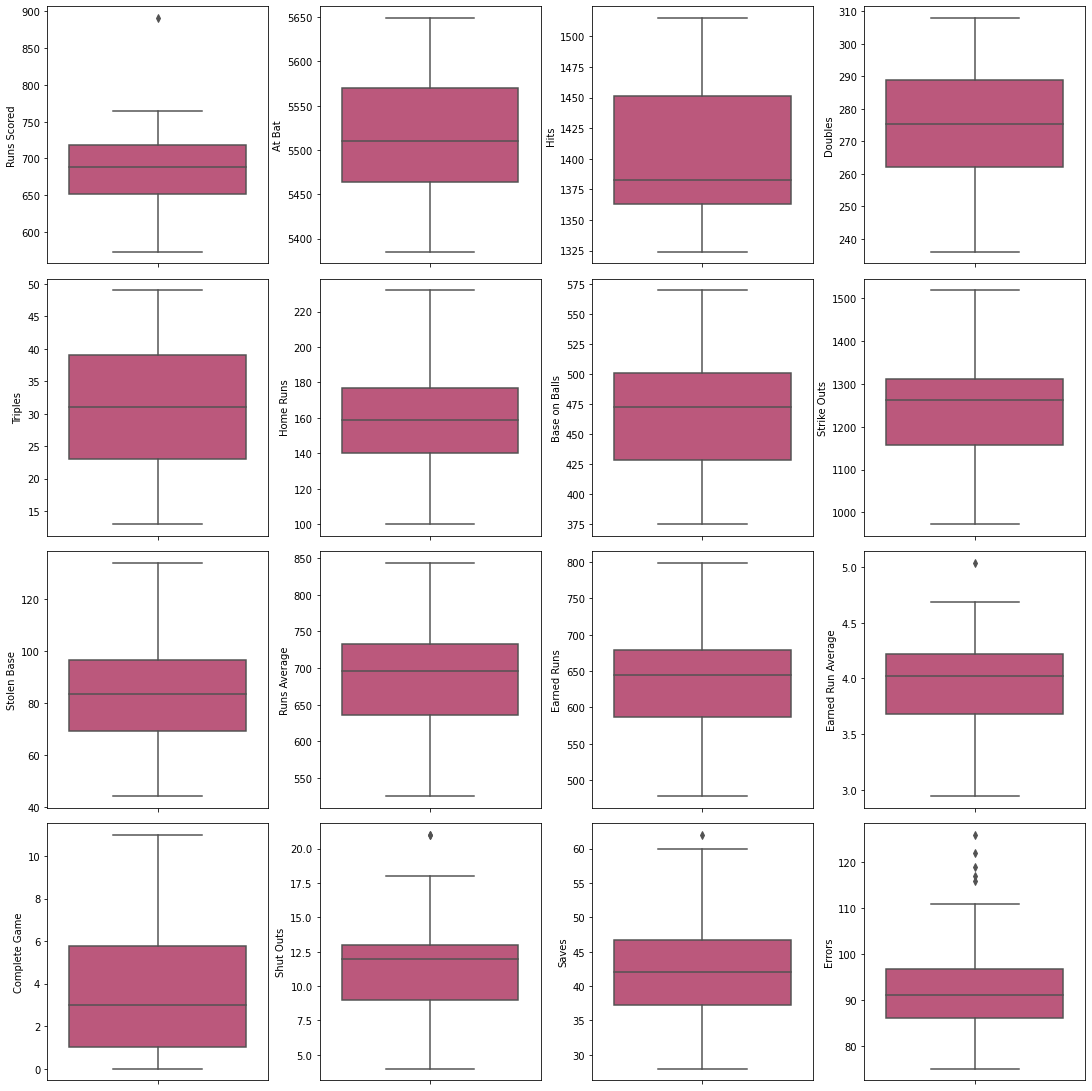

In [17]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

<font size=3>The above box plot representation clearly shows few outlier points present in Runs Scored, Earned Run Average, Shut Outs, Saves and Errors. These will need to be treated further before building our machine learning model.

<font size=3>**Distribution Plot**

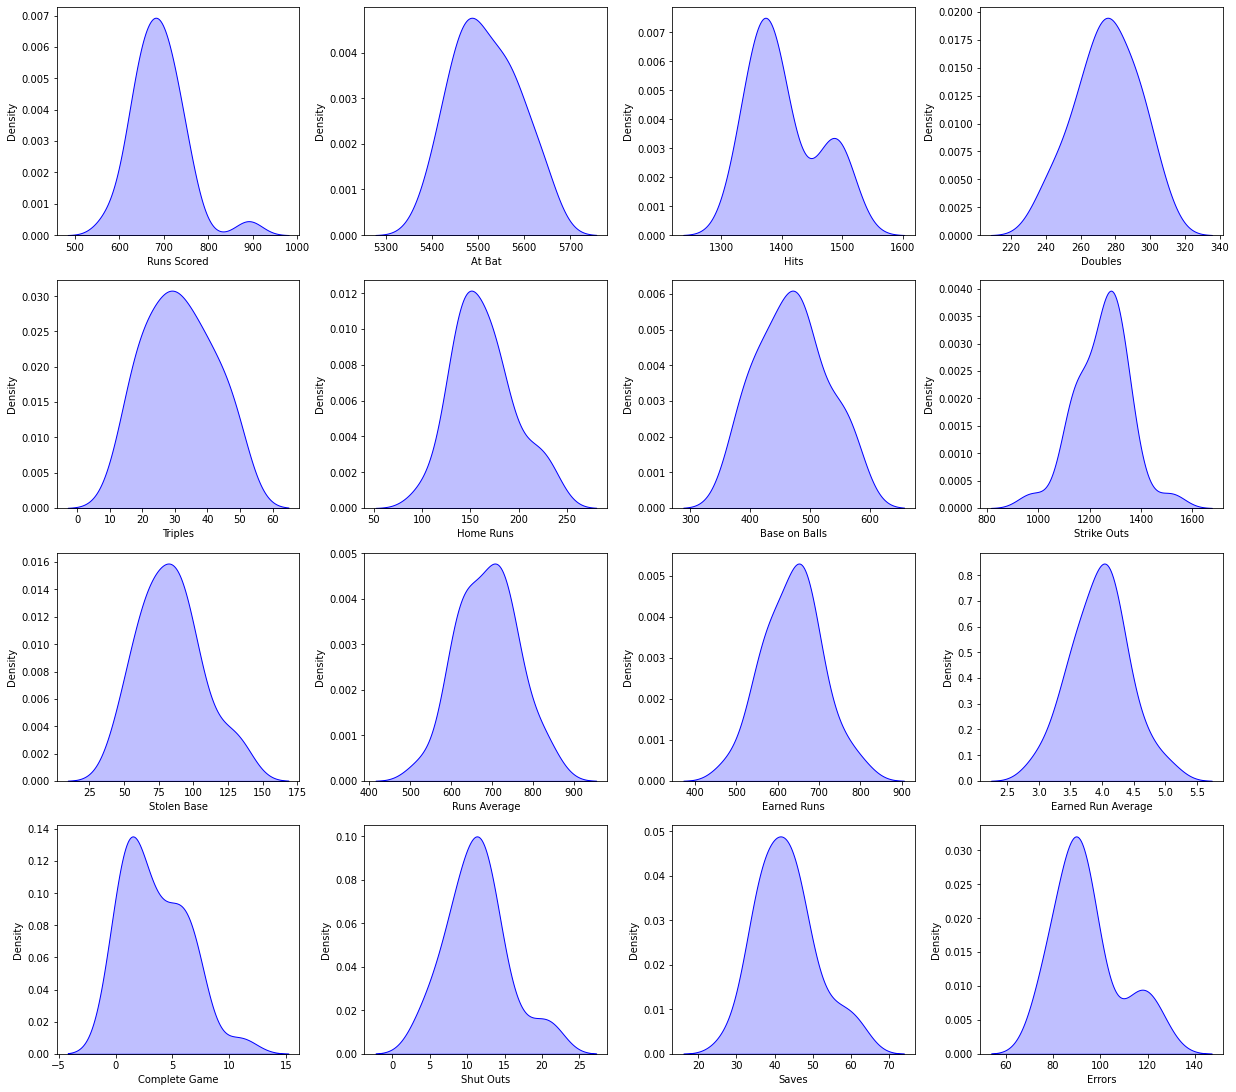

In [18]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(17,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.distplot(value, ax=ax[index], hist=False, color="b", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

<font size=3> In the above cell we see that mostly all our column data are normally distributed except for Runs Scored, Complete Game, SHut Outs and Errors columns that have slight skewness in them and will need to be treated accordingly.

<font size=4>**Bivariate analysis**

<font size=3> **Line Plot**

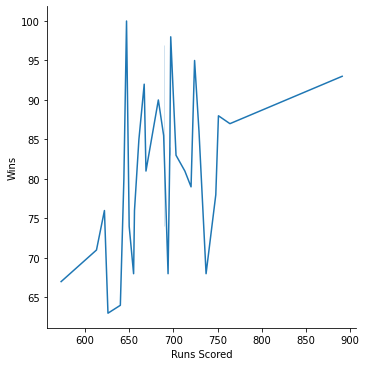

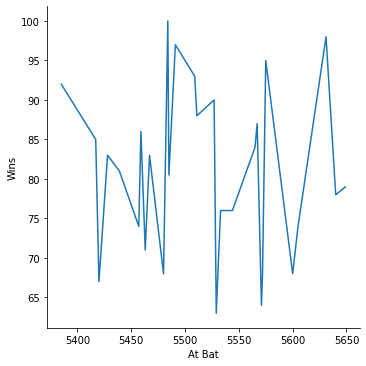

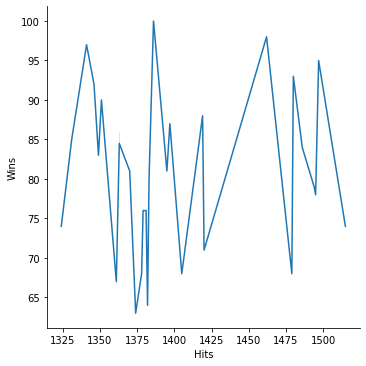

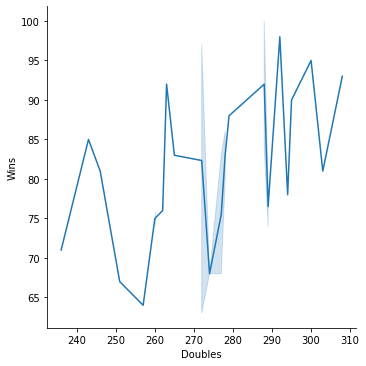

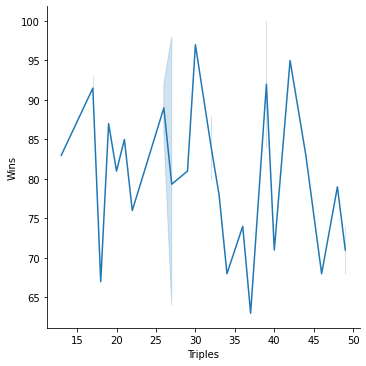

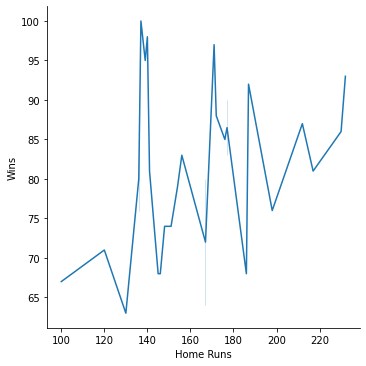

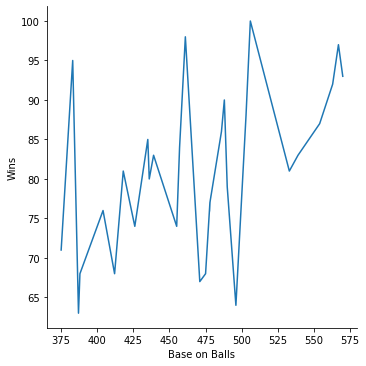

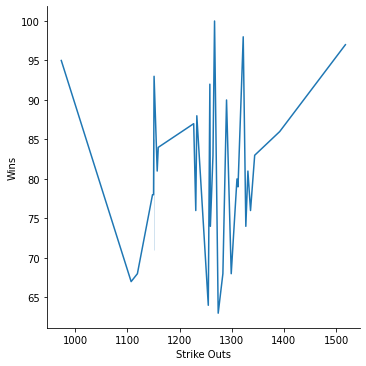

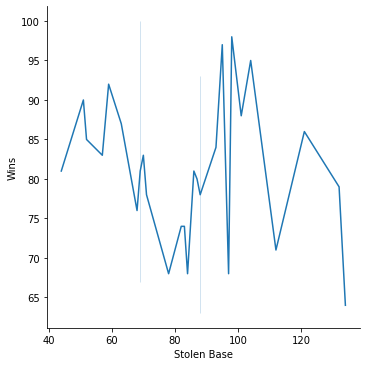

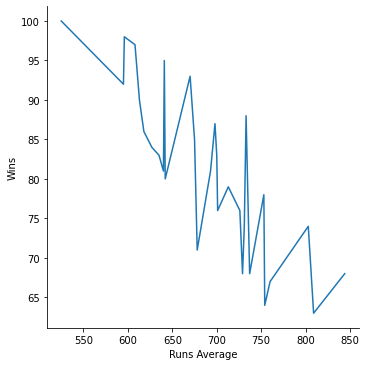

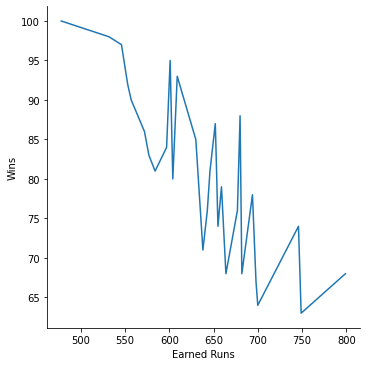

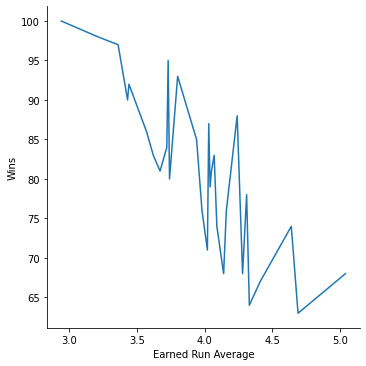

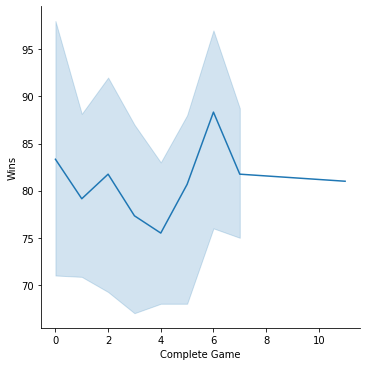

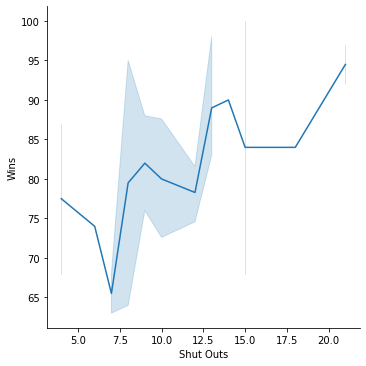

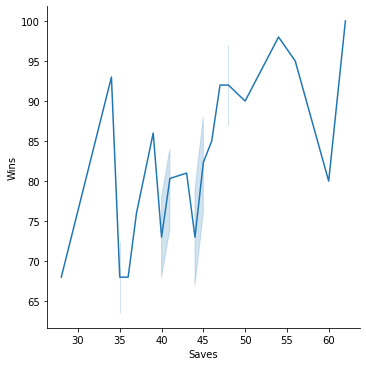

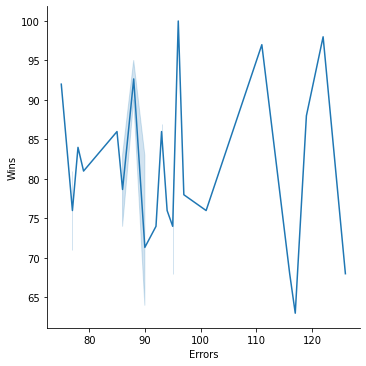

In [19]:
index = 0
features = df.drop("Wins", axis=1)
for col, value in features.items():
    sns.relplot(x=col, y="Wins", kind="line", data=df)
    index += 1
plt.show()

<font size=3>By taking a look at all the line plots corresponding to the "Wins" column shows how those feature are related with the contribution on getting those particular numbers. Some of them are directly proportional while others are either inversely proportional to our label or do not have much to offer.

Therefore we can say that the relationships between the label and all the features can be viewed from above graphs: All of the above features (except the errors) are positively correlated with our label In case the number of runs increases then the chance of win increases obviously In case the doubles increase then the chance of win increases In case the triples increases then the chance of win increases In case the home runs increases then the chance of win increases In case the walks on balls increases then the chance of win increases In case the strike outs increases then the chance of win increases for the opposite team In case the stolen bases increases then the chance of win increases again for the opposite team In case the runs allowed increases then the chance of win increases In case the earned run and earned run average increases the chance of win increases automatically

<font size=3> **Bar Plot**

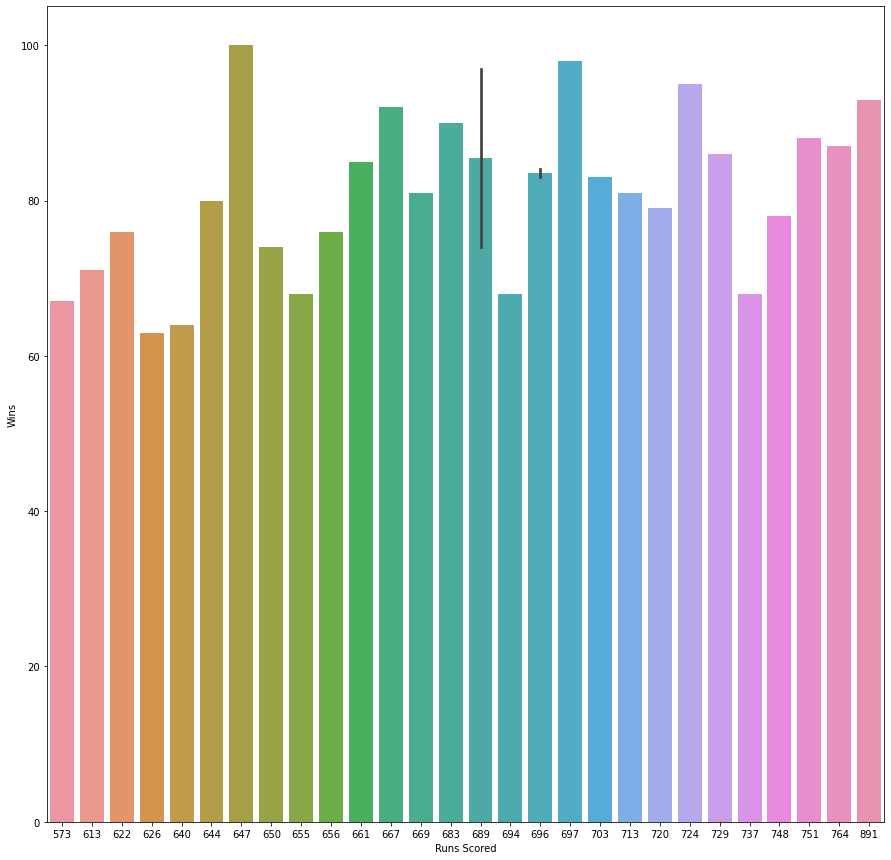

In [20]:
plt.figure(figsize=(15,15))
sns.barplot(x="Runs Scored", y="Wins", data=df)
plt.show()

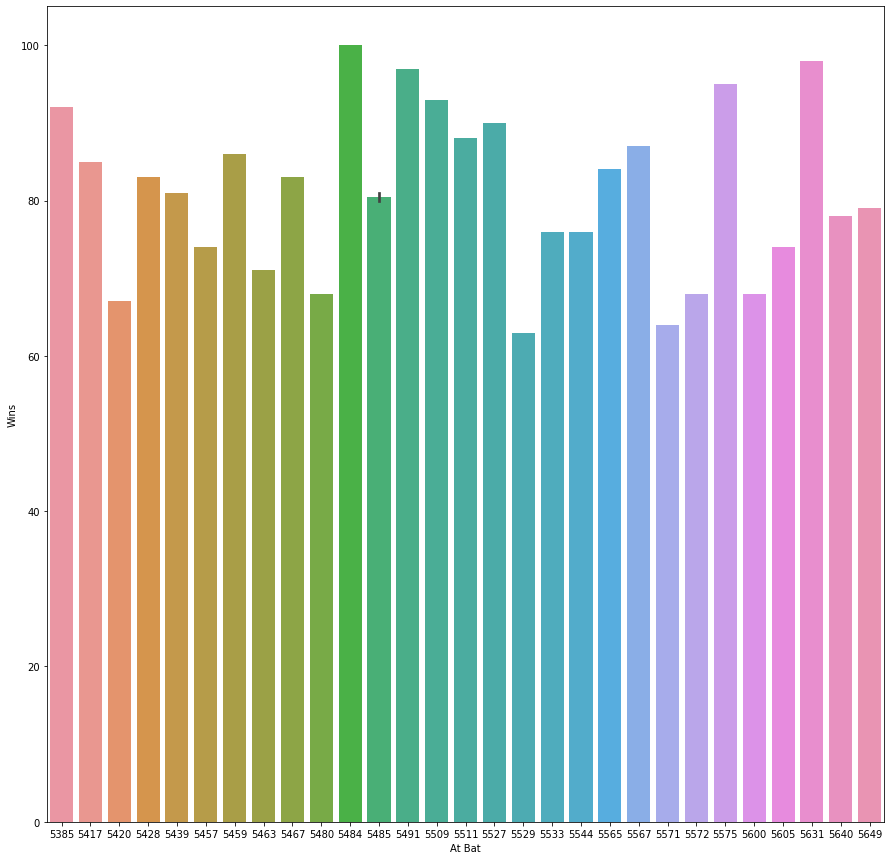

In [21]:
plt.figure(figsize=(15,15))
sns.barplot(x="At Bat", y="Wins", data=df)
plt.show()

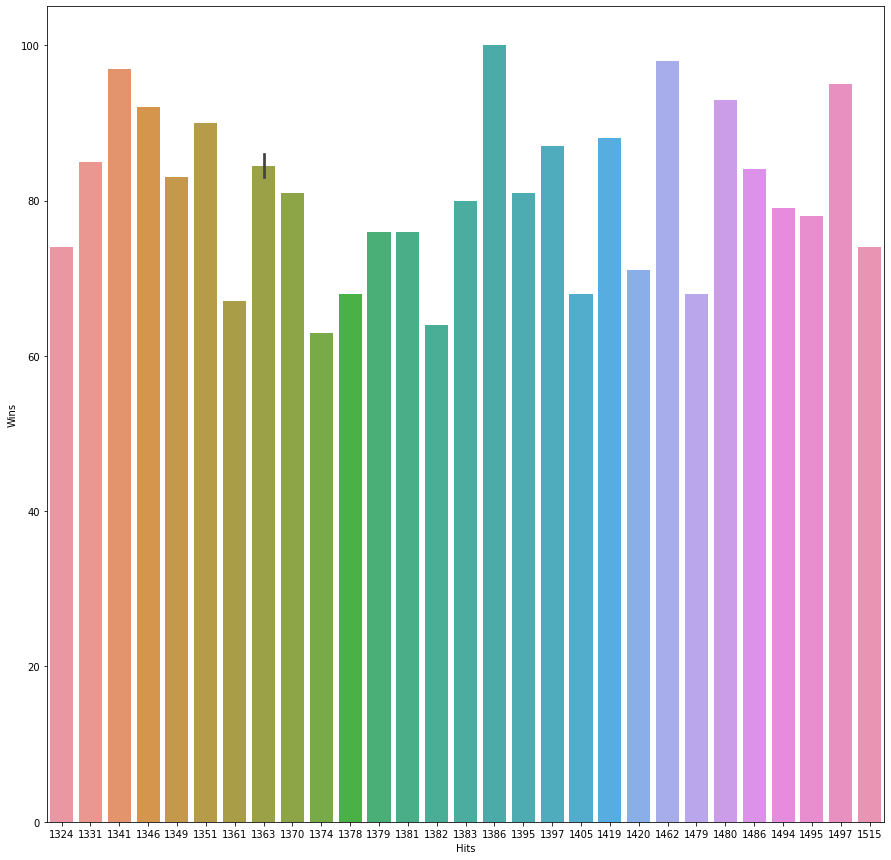

In [22]:
plt.figure(figsize=(15,15))
sns.barplot(x="Hits", y="Wins", data=df)
plt.show()

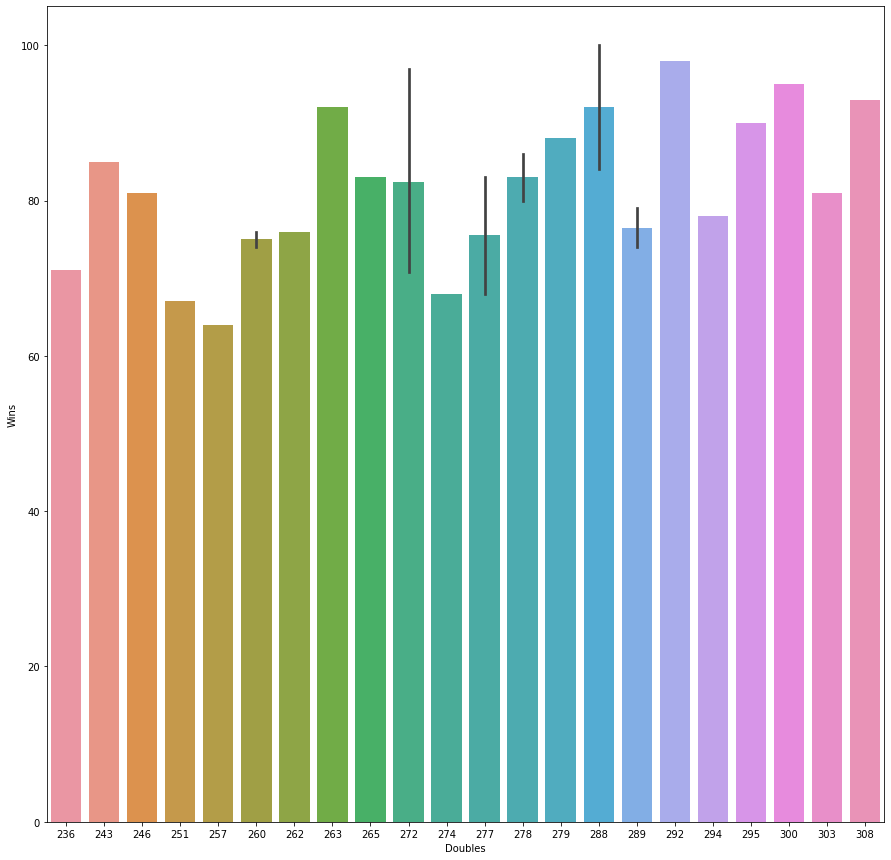

In [23]:
plt.figure(figsize=(15,15))
sns.barplot(x="Doubles", y="Wins", data=df)
plt.show()

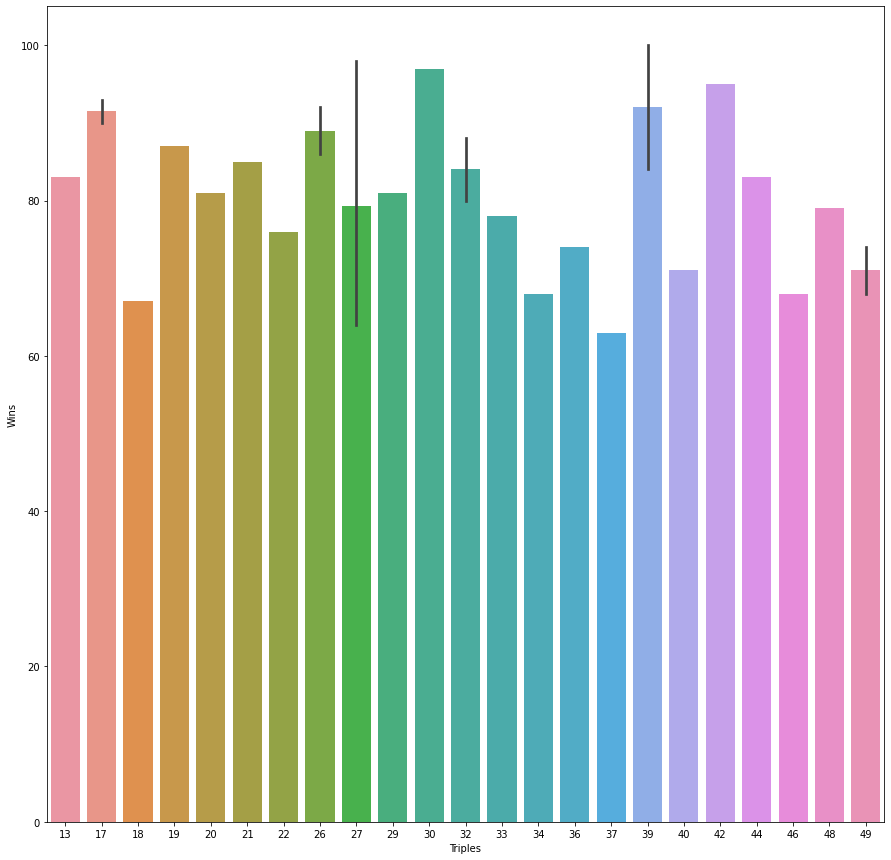

In [24]:
plt.figure(figsize=(15,15))
sns.barplot(x="Triples", y="Wins", data=df)
plt.show()

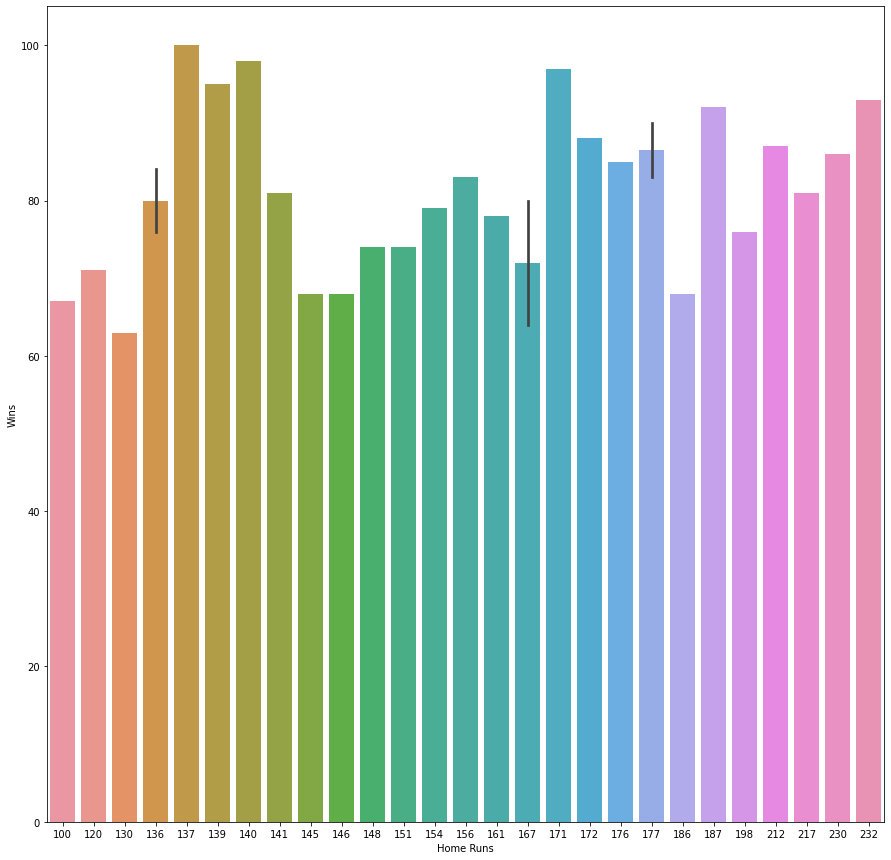

In [25]:
plt.figure(figsize=(15,15))
sns.barplot(x="Home Runs", y="Wins", data=df)
plt.show()

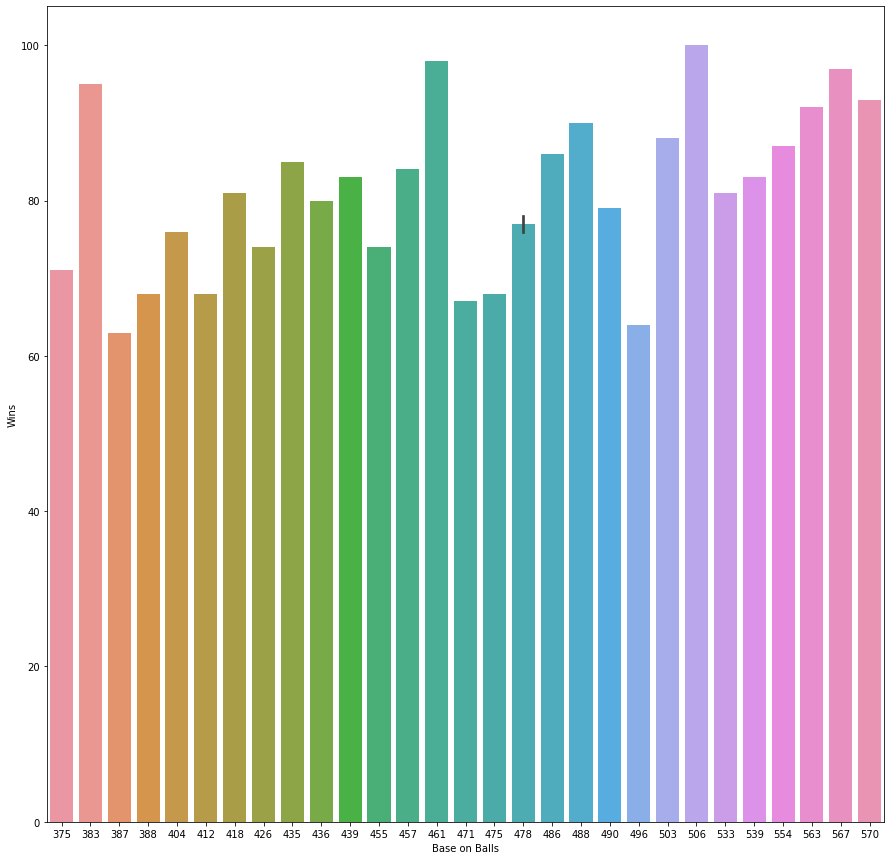

In [26]:
plt.figure(figsize=(15,15))
sns.barplot(x="Base on Balls", y="Wins", data=df)
plt.show()

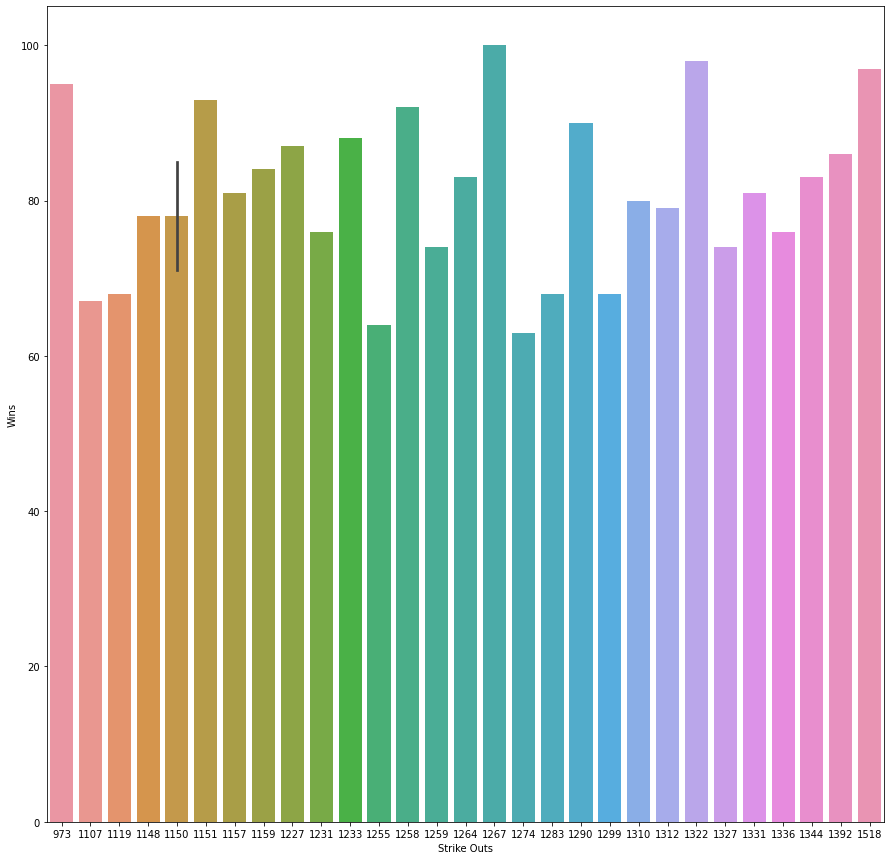

In [27]:
plt.figure(figsize=(15,15))
sns.barplot(x="Strike Outs", y="Wins", data=df)
plt.show()

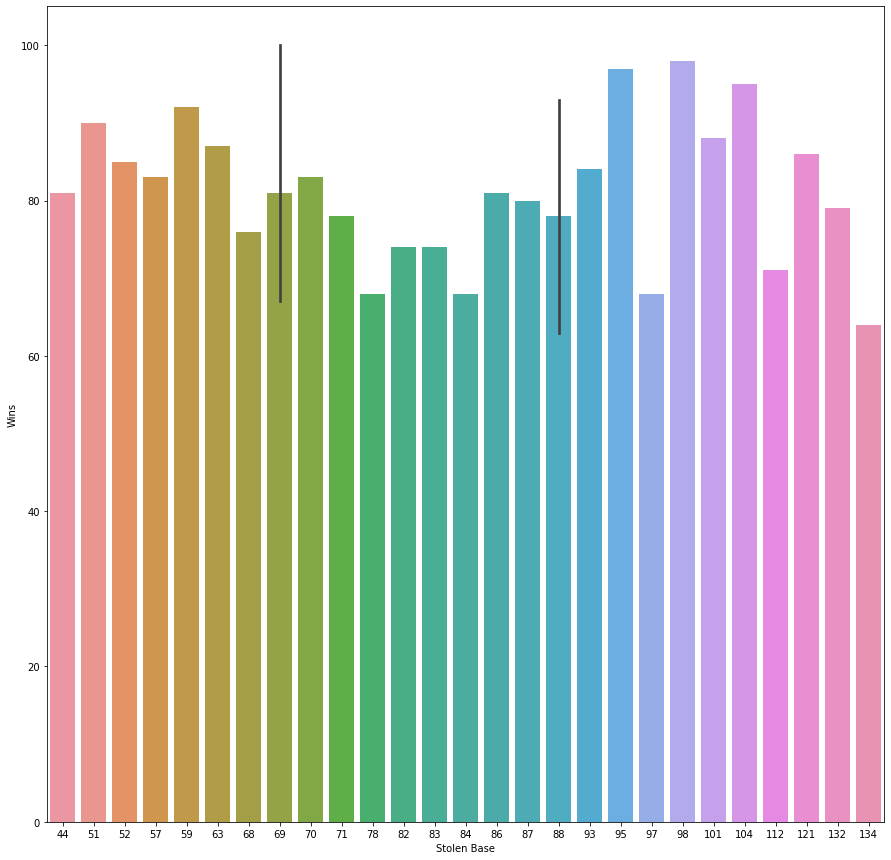

In [28]:
plt.figure(figsize=(15,15))
sns.barplot(x="Stolen Base", y="Wins", data=df)
plt.show()

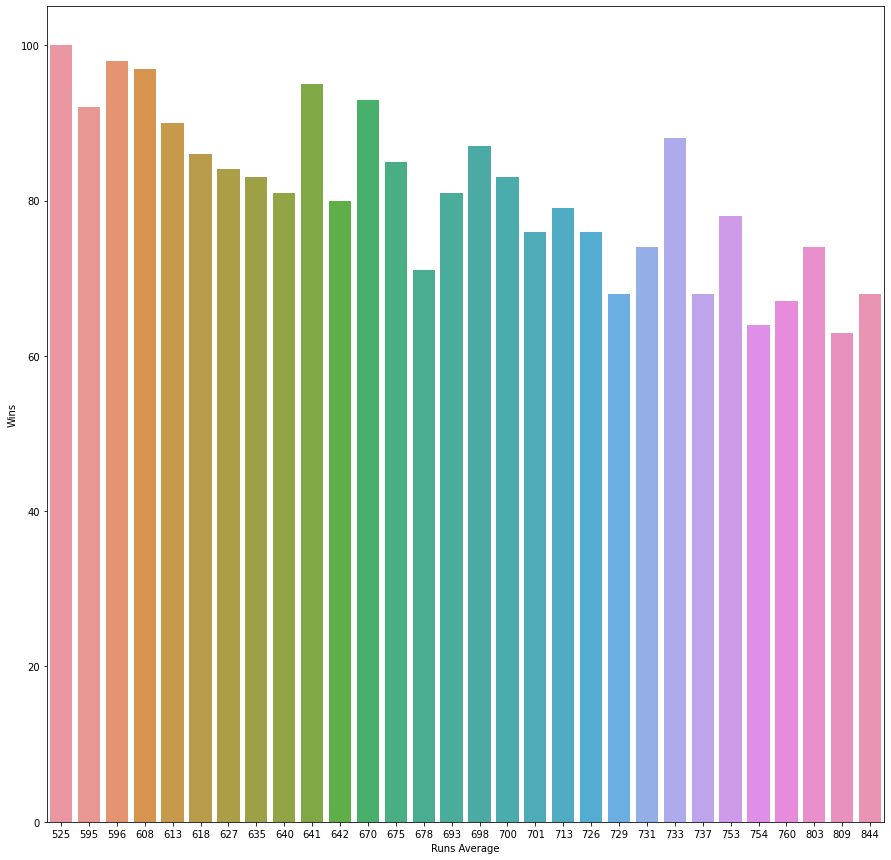

In [29]:
plt.figure(figsize=(15,15))
sns.barplot(x="Runs Average", y="Wins", data=df)
plt.show()

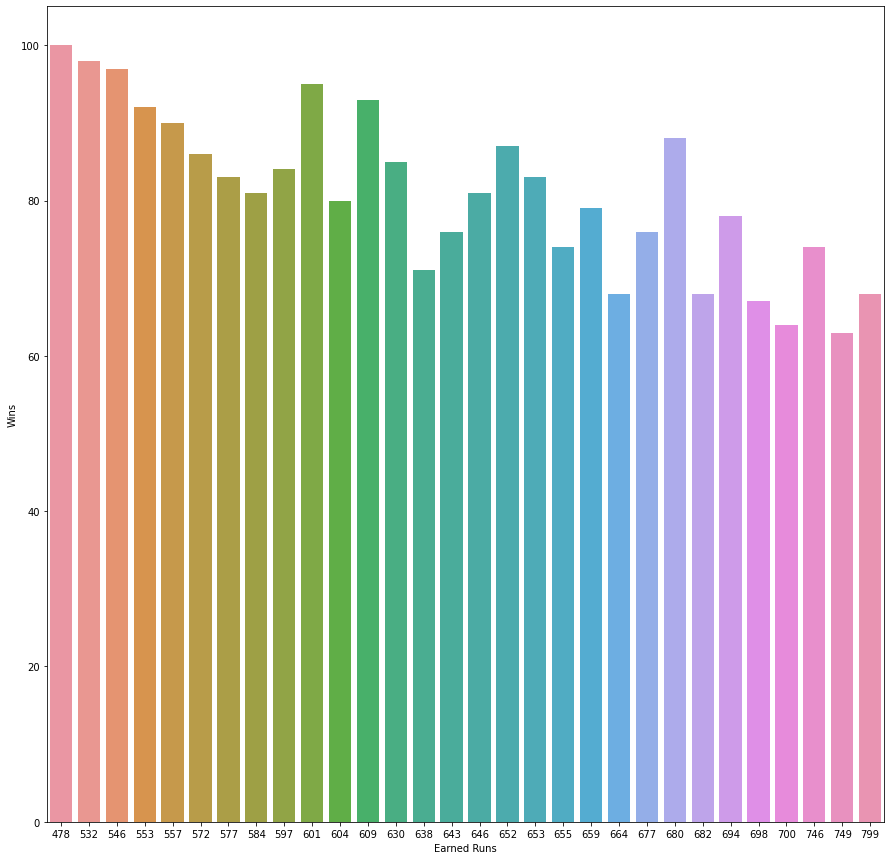

In [30]:
plt.figure(figsize=(15,15))
sns.barplot(x="Earned Runs", y="Wins", data=df)
plt.show()

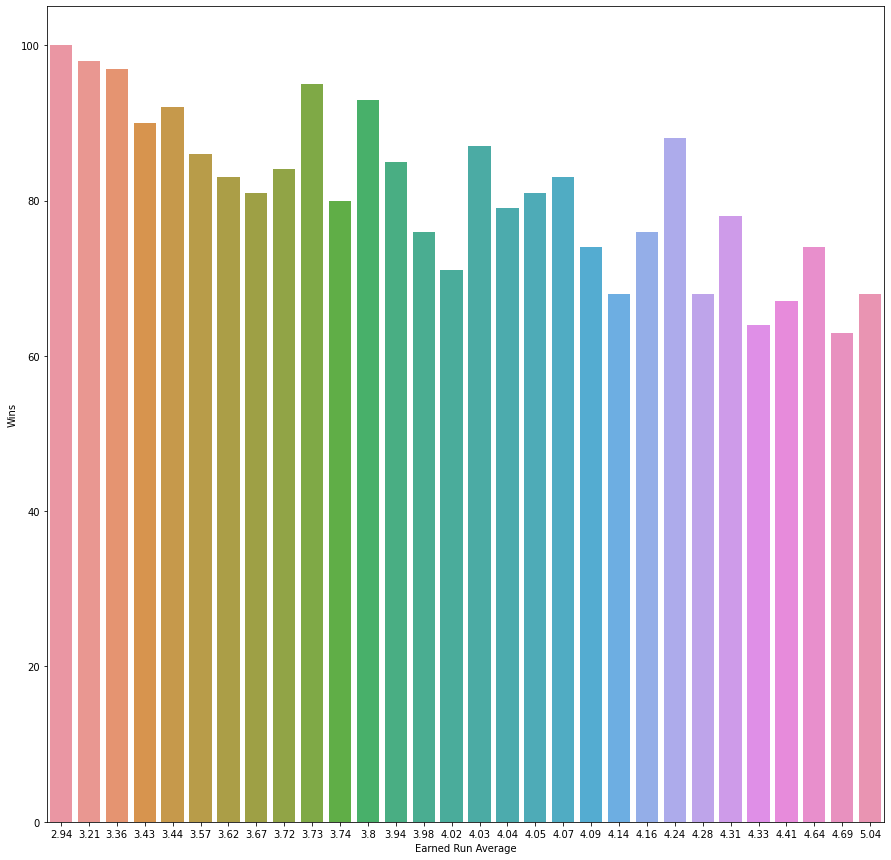

In [31]:
plt.figure(figsize=(15,15))
sns.barplot(x="Earned Run Average", y="Wins", data=df)
plt.show()

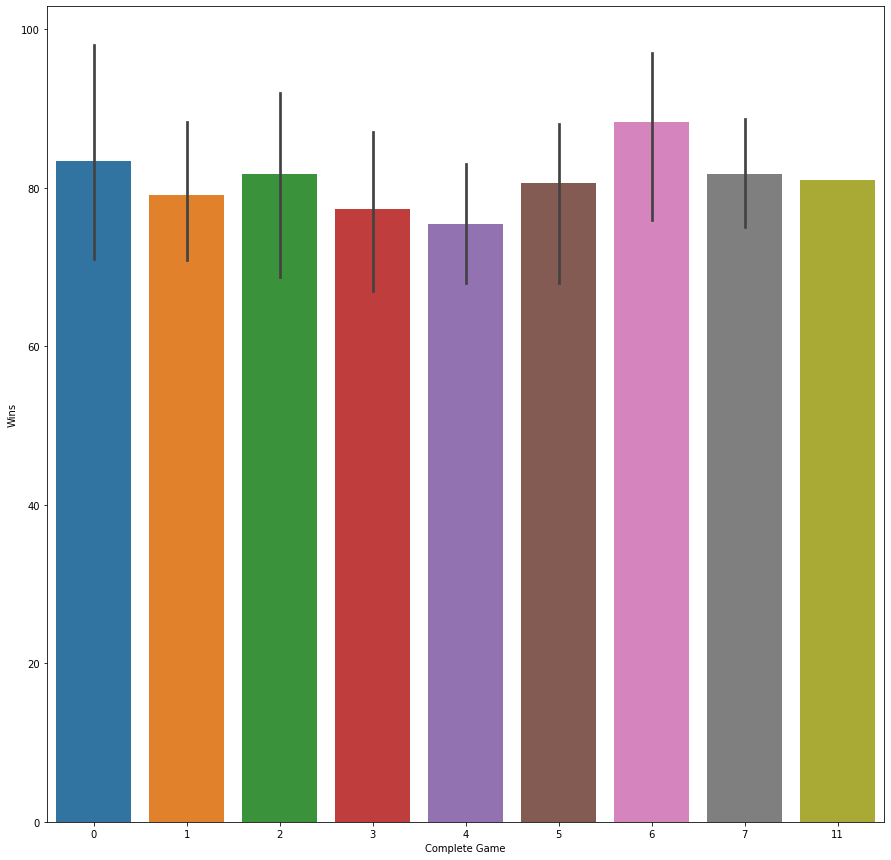

In [32]:
plt.figure(figsize=(15,15))
sns.barplot(x="Complete Game", y="Wins", data=df)
plt.show()

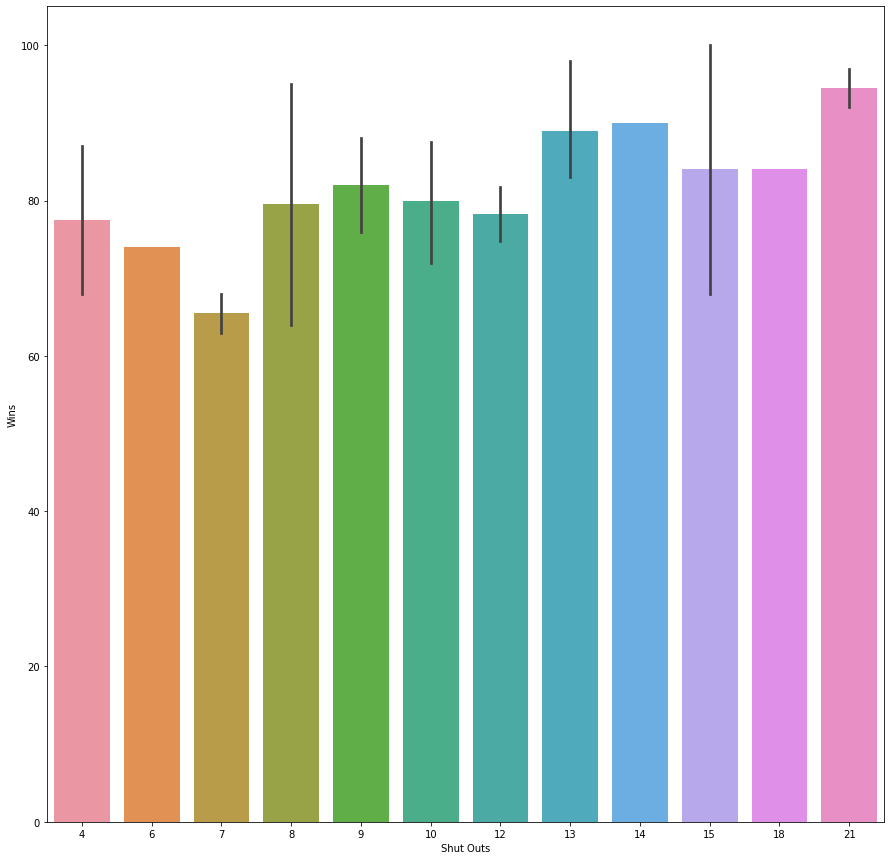

In [33]:
plt.figure(figsize=(15,15))
sns.barplot(x="Shut Outs", y="Wins", data=df)
plt.show()

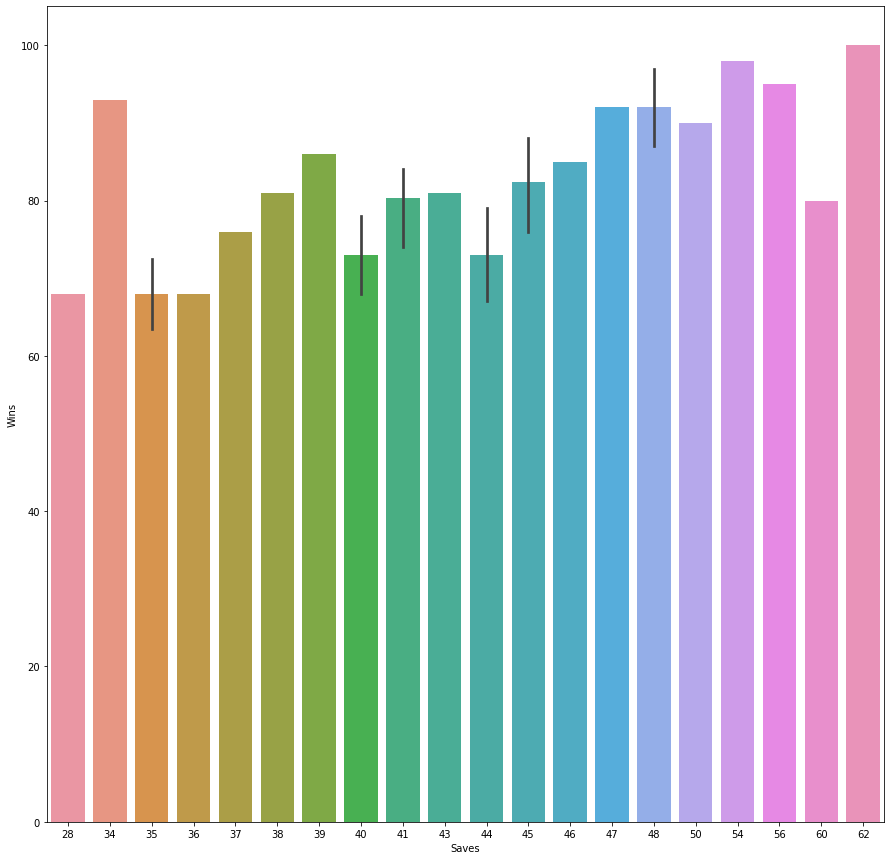

In [34]:
plt.figure(figsize=(15,15))
sns.barplot(x="Saves", y="Wins", data=df)
plt.show()

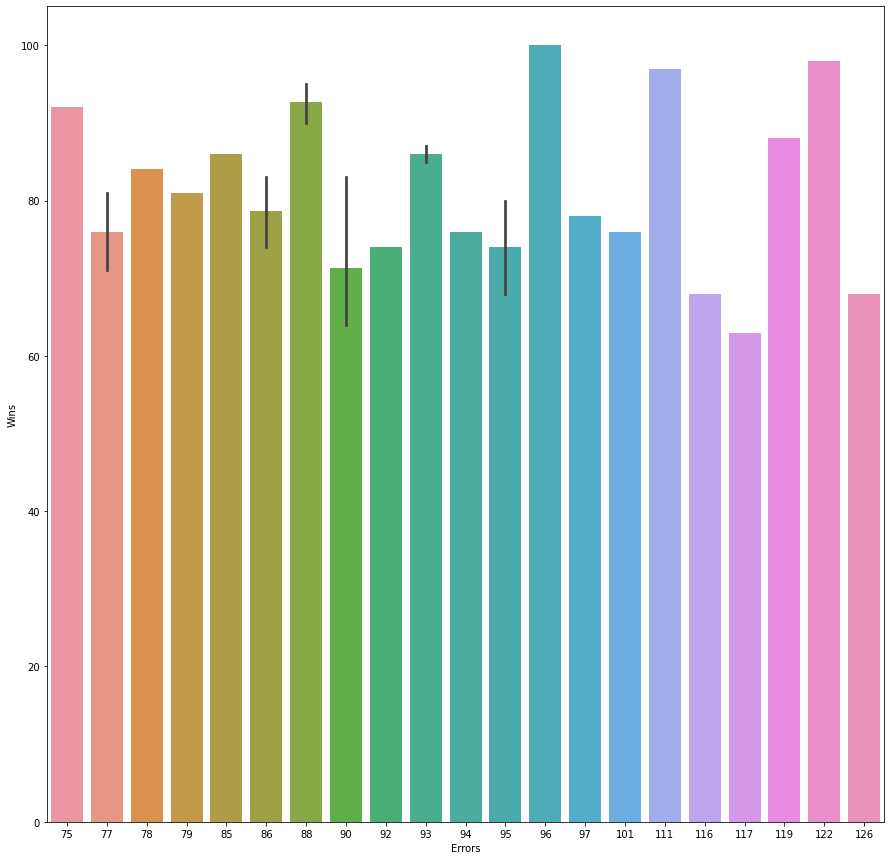

In [35]:
plt.figure(figsize=(15,15))
sns.barplot(x="Errors", y="Wins", data=df)
plt.show()

<font size=3>**Joint Plot**

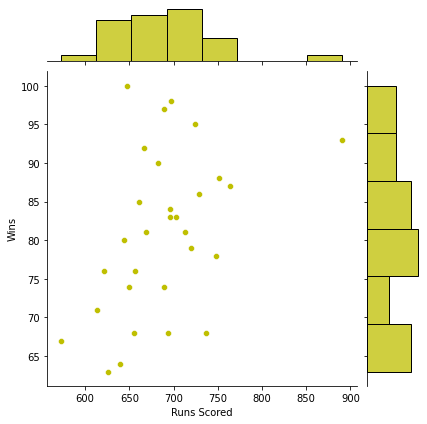

In [36]:
sns.jointplot(x="Runs Scored", y="Wins", data=df, color="y")

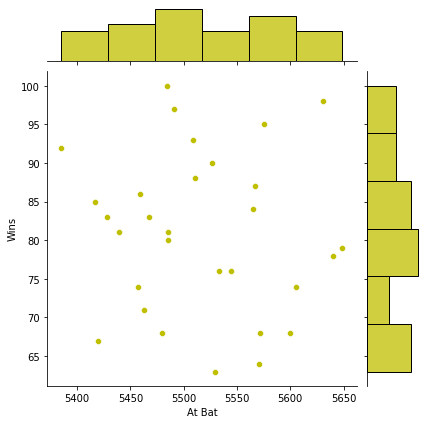

In [37]:
sns.jointplot(x="At Bat", y="Wins", data=df, color="y")

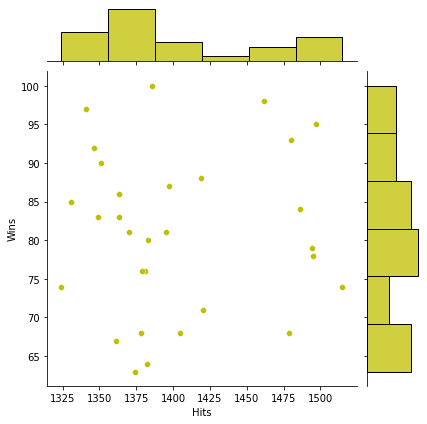

In [38]:
sns.jointplot(x="Hits", y="Wins", data=df, color="y")

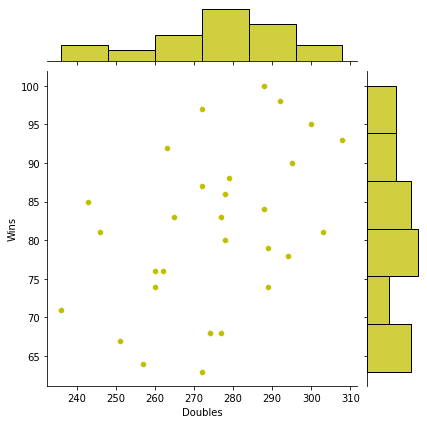

In [39]:
sns.jointplot(x="Doubles", y="Wins", data=df, color="y")

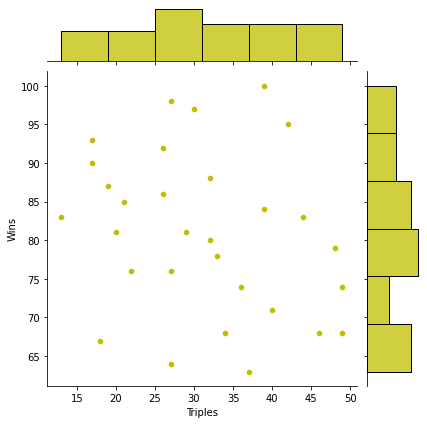

In [40]:
sns.jointplot(x="Triples", y="Wins", data=df, color="y")

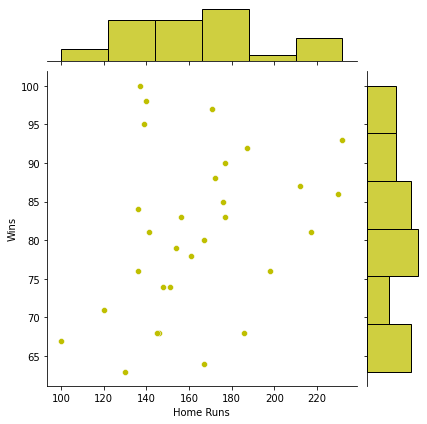

In [41]:
sns.jointplot(x="Home Runs", y="Wins", data=df, color="y")

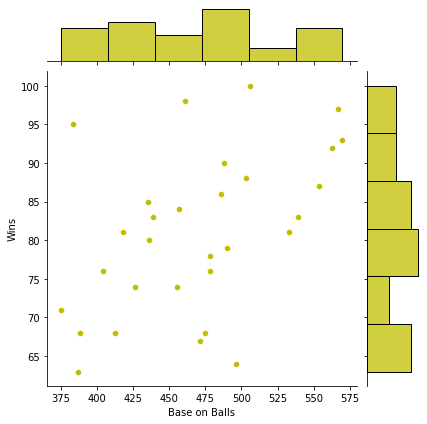

In [42]:
sns.jointplot(x="Base on Balls", y="Wins", data=df, color="y")

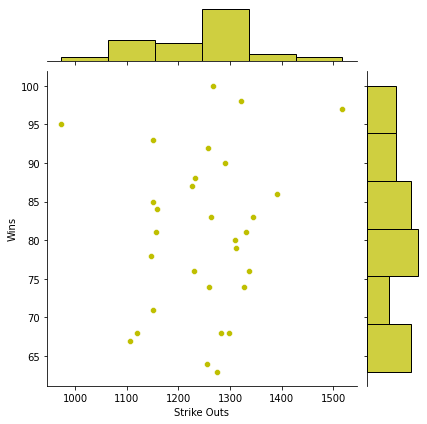

In [43]:
sns.jointplot(x="Strike Outs", y="Wins", data=df, color="y")

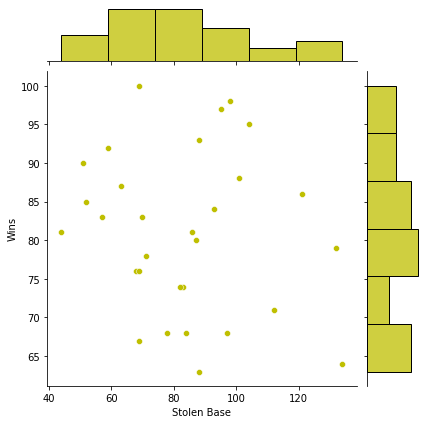

In [44]:
sns.jointplot(x="Stolen Base", y="Wins", data=df, color="y")

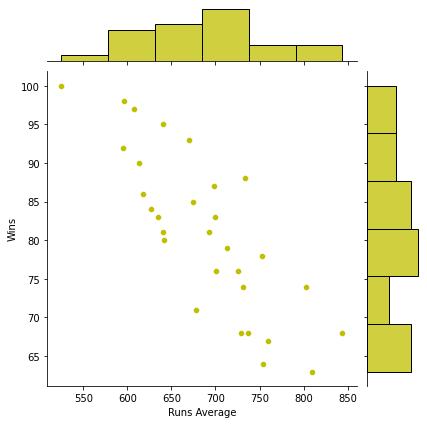

In [45]:
sns.jointplot(x="Runs Average", y="Wins", data=df, color="y")

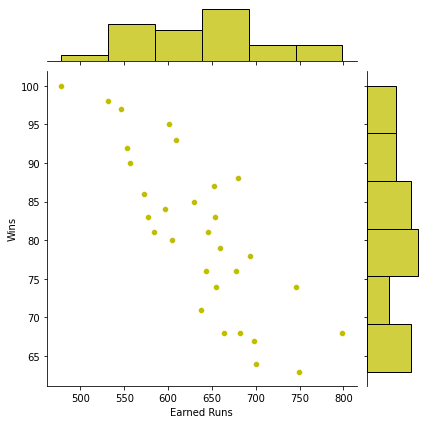

In [46]:
sns.jointplot(x="Earned Runs", y="Wins", data=df, color="y")

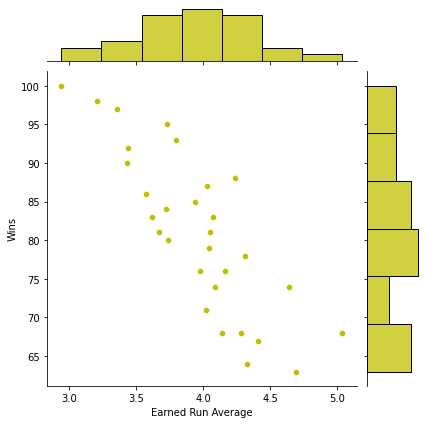

In [47]:
sns.jointplot(x="Earned Run Average", y="Wins", data=df, color="y")

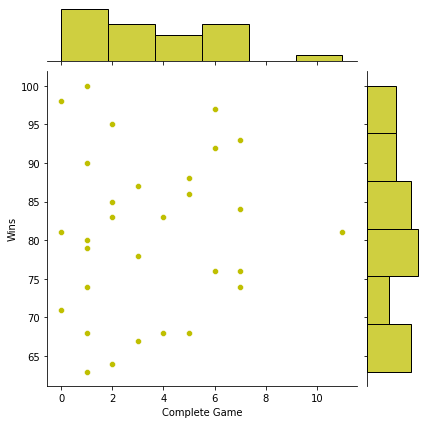

In [48]:
sns.jointplot(x="Complete Game", y="Wins", data=df, color="y")

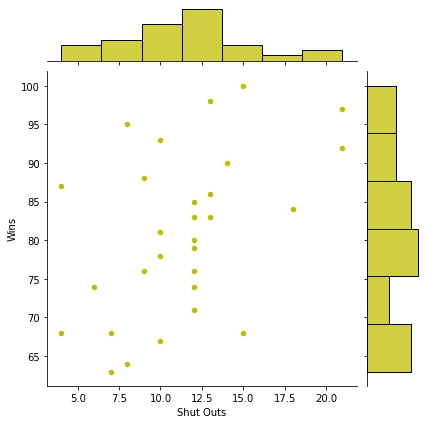

In [49]:
sns.jointplot(x="Shut Outs", y="Wins", data=df, color="y")

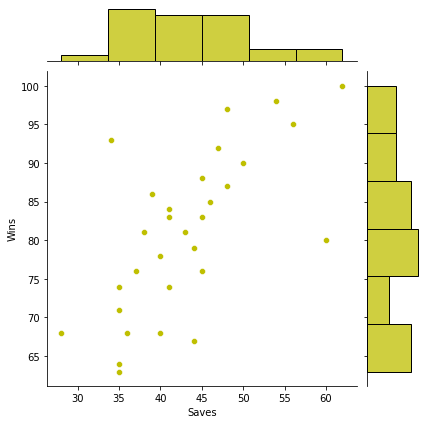

In [50]:
sns.jointplot(x="Saves", y="Wins", data=df, color="y")

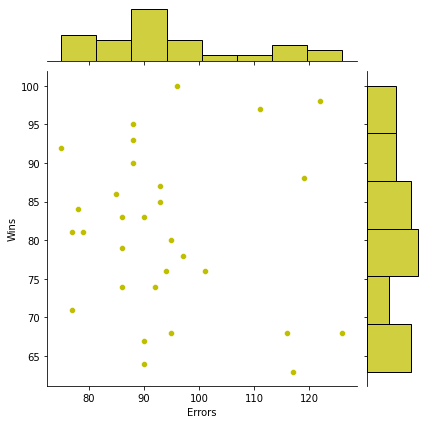

In [51]:
sns.jointplot(x="Errors", y="Wins", data=df, color="y")

<font size=3> **LM Plot**

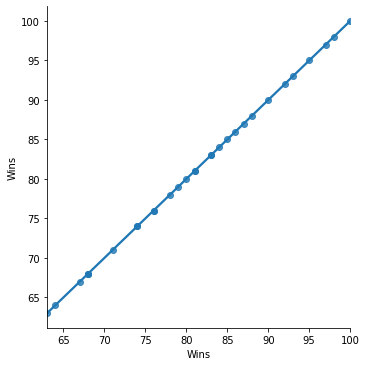

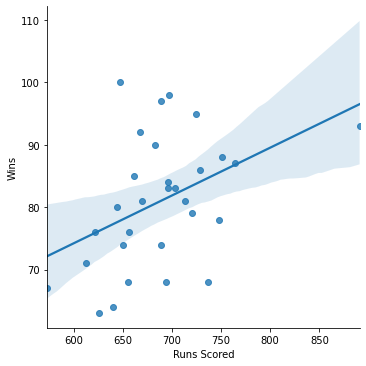

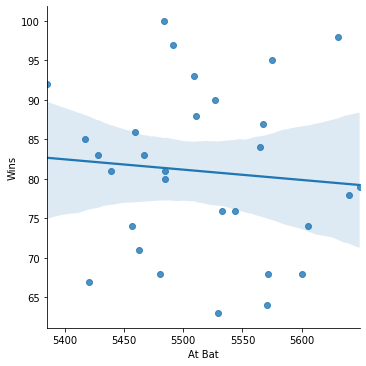

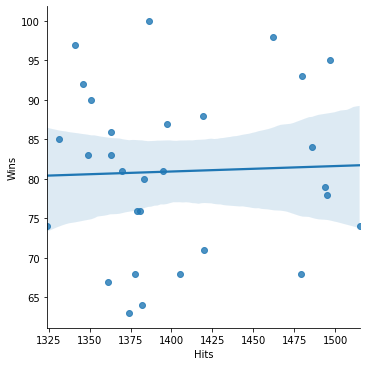

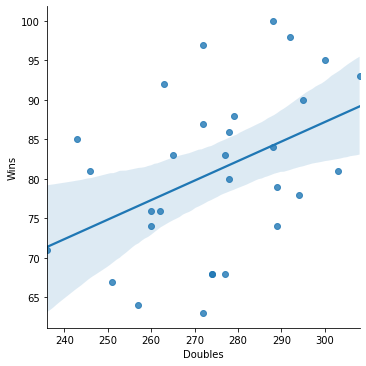

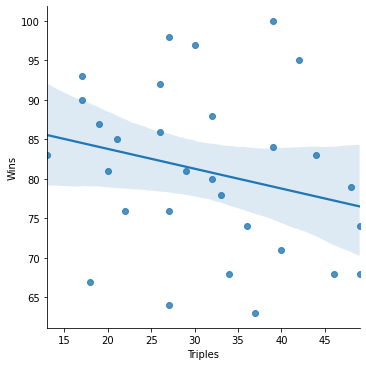

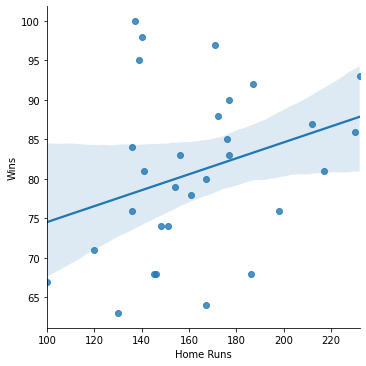

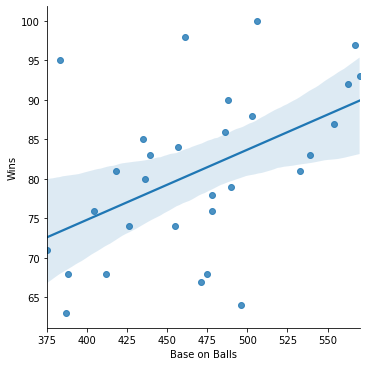

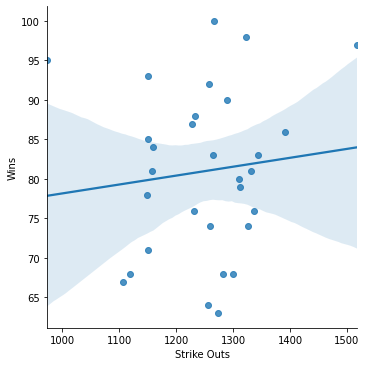

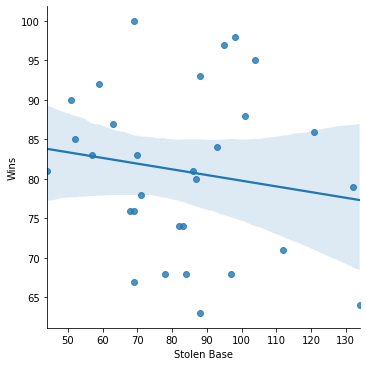

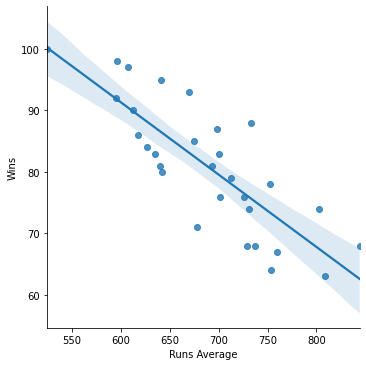

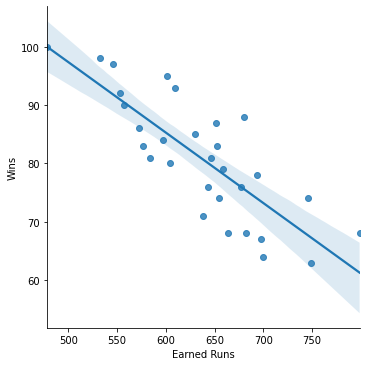

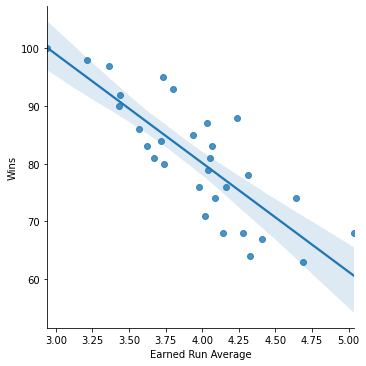

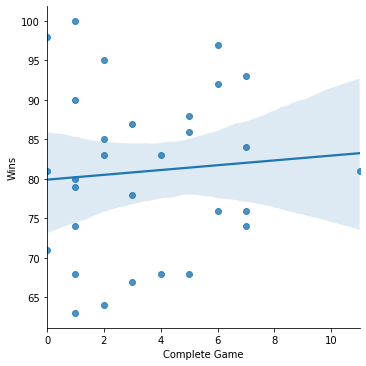

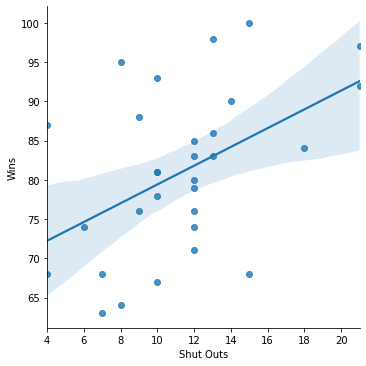

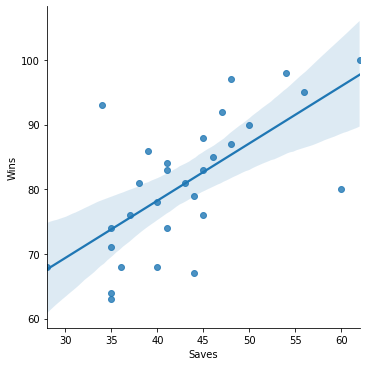

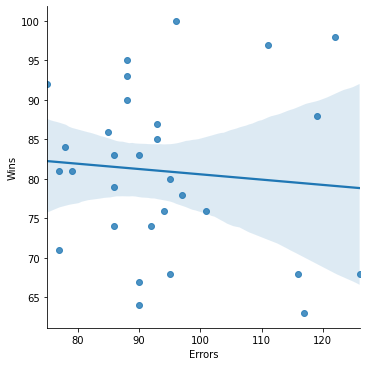

In [52]:
for i in df:
    sns.lmplot(x = i , y ='Wins' , data = df)

<font size=3> From above plot we can see that runs is directly proportional to wins, At Bats is inversely proportional to wins, Hits is not much impacted by Wins, Doubles is proportional to Wins, Triples is again proportional to Wins, Home runs is proportional to Wins, Walks is also proportional to wins, Strike out is proportional to wins, Stolen bases is proportional to Wins, Runs allowed is inversely proportional to Wins, Earned runs is again inversely proportional to Wins, Earned runs average is also inversely proportional to Wins, Wins is somewhat affected by the number of Complete Games, Wins is slightly affected by shut outs and Wins is directly propertional to Saves.

<font size=4> **Multivariate Analysis**

<font size=3>**Pair Plot**

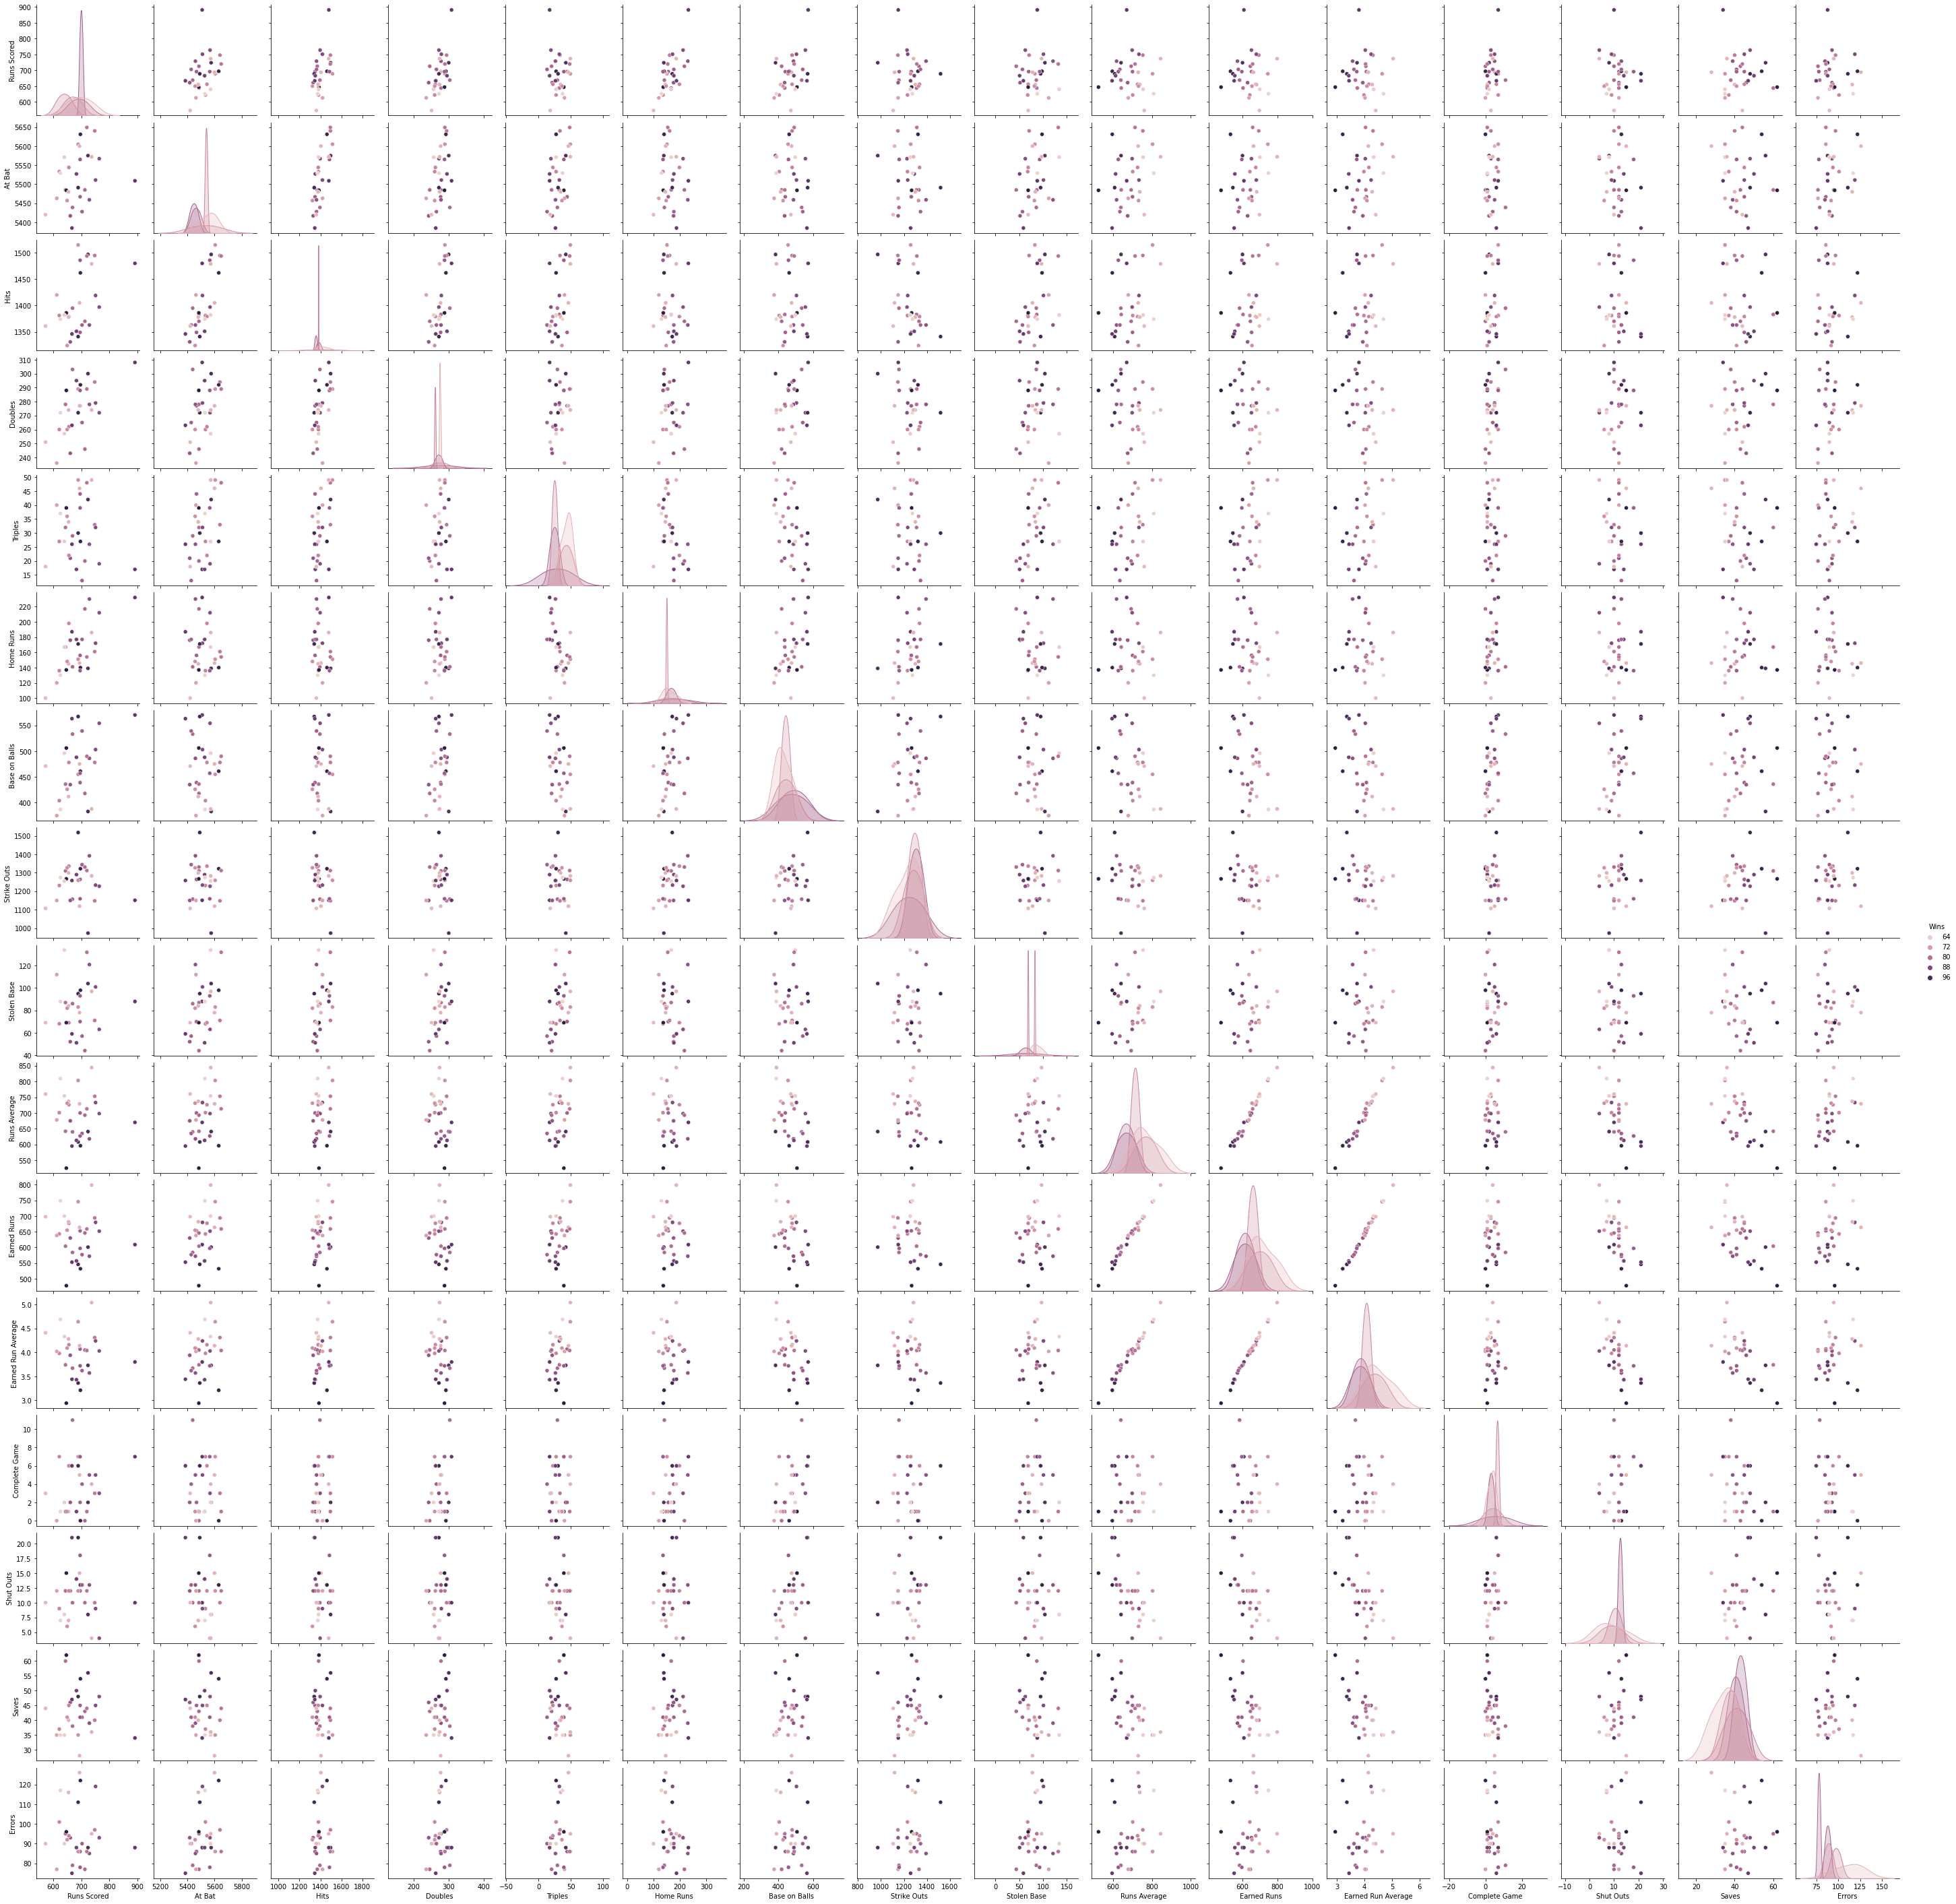

In [53]:
sns.pairplot(df, hue="Wins")

Since there are 17 columns present in our dataset making a pairplot for all of them has given us a very tiny image with an unreadable format therefore we will take help of a heatmap to get the collinearity details for the columns in our dataset.<br>

Correlation using a Heatmap<br>
1) Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.<br>
2)Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.<br>

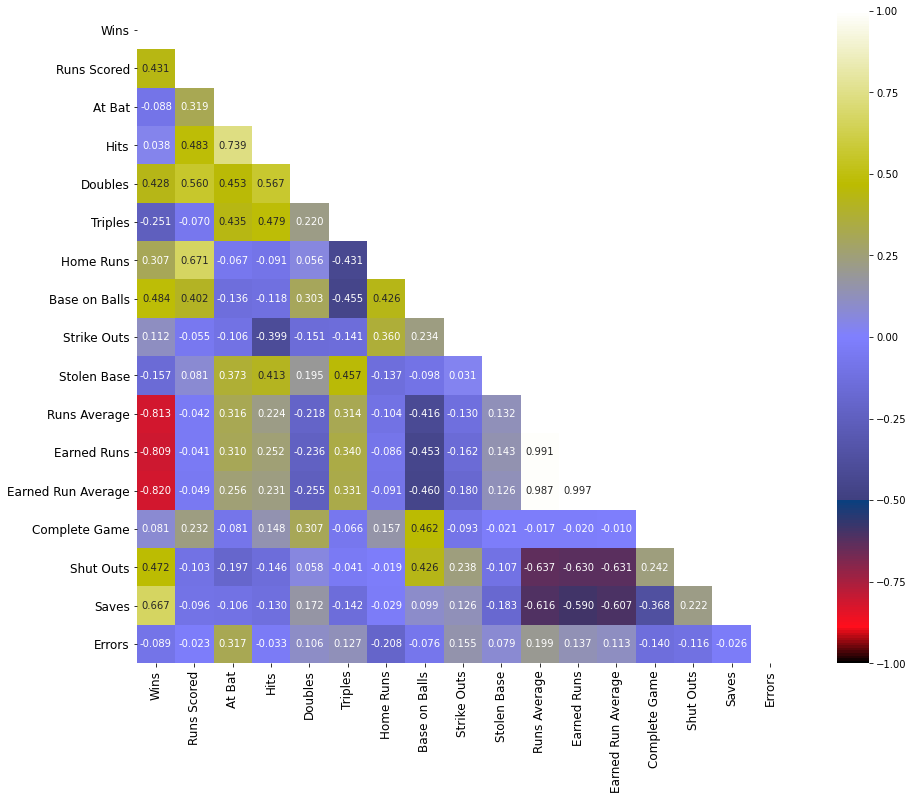

In [54]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In the above heatmap we see that our label "Wins" column is showing negatively correlated with feature columns "Runs Average", "Earned Runs" and "Earned Run Average". Also there is visible multi colinearity between the feature columns "Earned Runs", "Earned Run Average" and "Runs Average" data points. We may need to drop highly correlated columns to avoid this issue or I may try to make use of PCA to reduce the multi collearnig concern ahead before the model building phase.

<font size=5>**Outlier removal using Zscore**

In [55]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (30, 17)
Shape of the dataframe after removing outliers:  (29, 17)
Percentage of data loss post outlier removal:  3.3333333333333335


<font size=3>I have used the Z score method to remove any outlier that we could afford to lose from our original dataset. I see that since there were not many data points removed our new dataset would still have outlier traces but I would like to retain them.

<font size=3>**Box Plot**

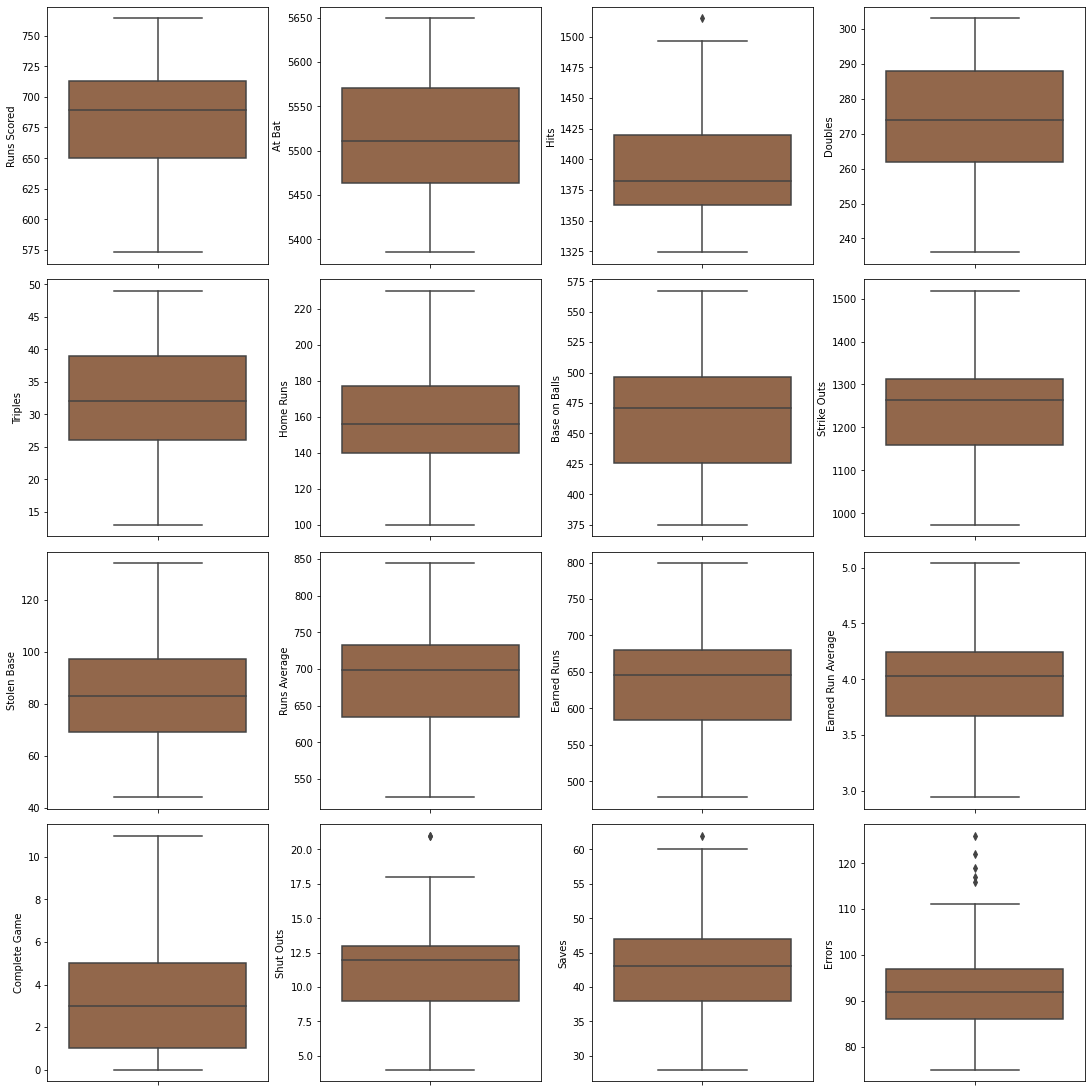

In [56]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(15,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="copper")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

In [57]:
df.skew()

Wins                  0.119013
Runs Scored          -0.215364
At Bat                0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Home Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base           0.494966
Runs Average          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Game         0.854980
Shut Outs             0.526943
Saves                 0.627480
Errors                0.840271
dtype: float64

<font size=3>I can see that there are still few columns showing slight skewness but overall it seems that they are either withing the acceptable range or very near to the acceptable range of skewness that is +/-0.5.

<font size=4>**Distribution Plot**

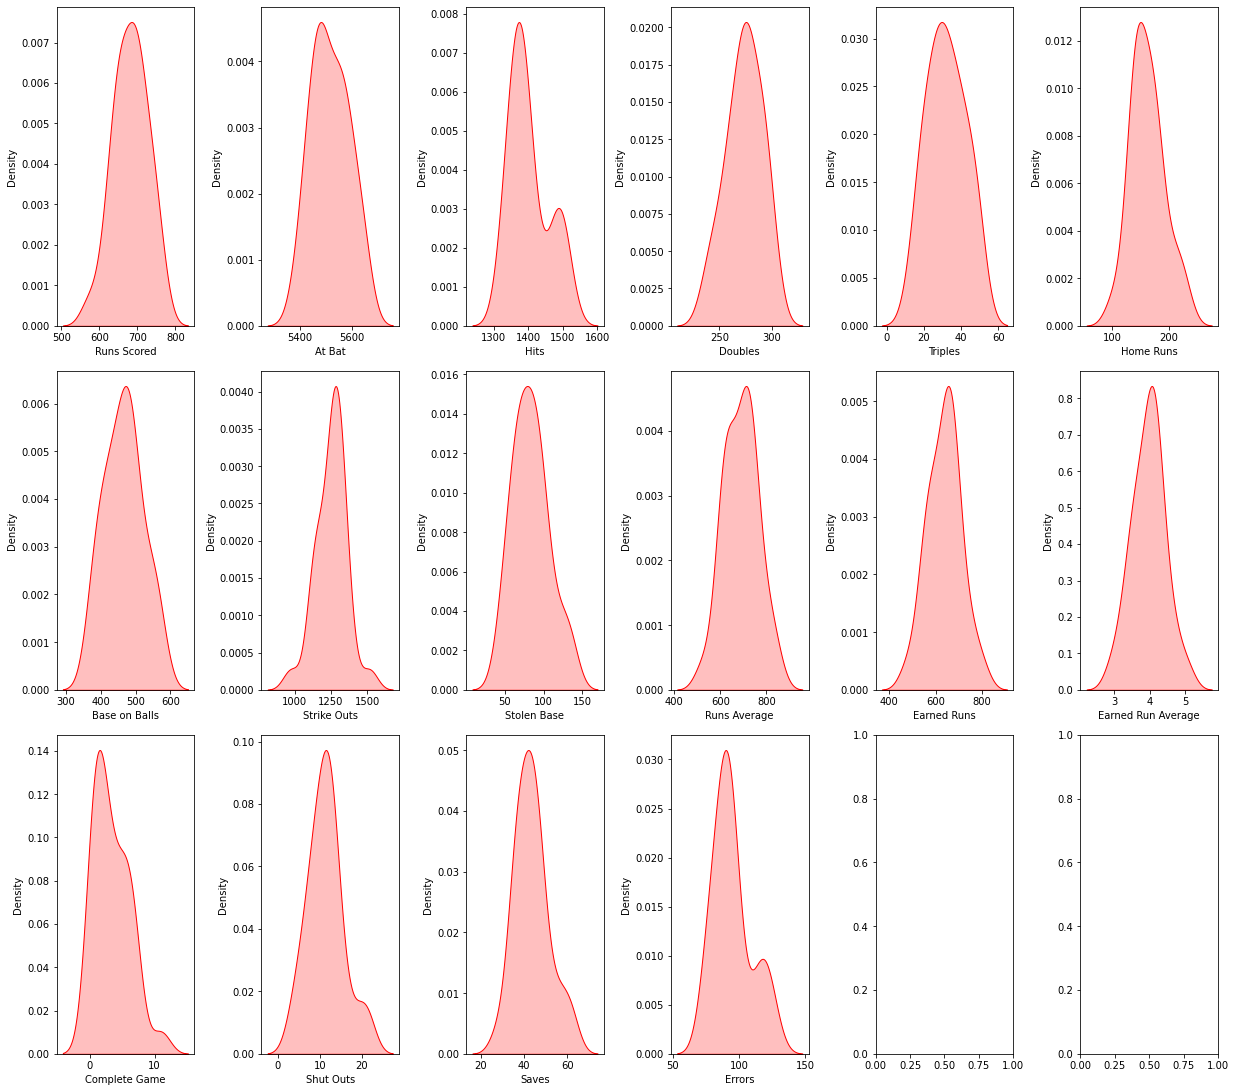

In [58]:
fig, ax = plt.subplots(ncols=6, nrows=3, figsize=(17,15))
index = 0
features = df.drop("Wins", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

<font size=3>After taking a look at the above distribution plot I can see that almost all of the feature columns are able to show a bell shape curve indicating towards a normalized dataset.

<font size=5>**Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label**

In [63]:
X = df.drop('Wins', axis=1)
Y = df['Wins']

<font size=5>**Feature Scaling**

In [64]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head(10)

,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,0.959398,0.830084,1.738306,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.501486,-0.813262,1.643157,-0.471091
1,0.331147,-0.702831,-0.938698,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.501486,0.159299,0.211006,-0.614898
2,-0.274666,-1.100253,-0.106656,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.854612,-0.326982,-0.700362,-1.118222
3,-1.329231,0.233951,-0.359886,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.363013,-0.570122,-0.830557,0.463653
4,0.174084,1.255894,2.063888,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.363013,0.159299,-1.090948,-0.614898
5,1.856900,0.716535,-0.070480,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,-0.128586,-1.785822,0.601593,-0.111574
6,0.712585,-0.447345,-0.558853,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-1.247285,-0.326982,-0.049384,-1.262029
7,-0.835605,-0.447345,-0.323710,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,-0.874386,0.159299,2.163939,0.032233
8,1.497899,1.752672,1.702131,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,-0.128586,-0.326982,-0.439971,0.176039
9,1.565212,-0.078310,0.327453,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,0.617213,-0.570122,0.211006,1.757915


<font size=5>**Principal component analysis (PCA)**

In [65]:
pca = PCA(n_components=16, svd_solver="full")
X = pd.DataFrame(pca.fit_transform(X), columns=X.columns)
X.head(10)

,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,1.040418,-2.998482,2.390631,-0.782861,-2.440002,-0.007693,0.640910,0.339132,0.837185,-0.021962,-0.596074,-0.288474,-0.148793,0.184951,-0.073924,0.009493
1,0.082502,0.473554,0.333381,-0.182392,-0.320951,0.467551,-1.039055,1.231838,0.189278,-0.677803,0.614050,-0.211540,0.019737,0.491118,0.052067,-0.032228
2,-1.234703,-0.852540,-0.038259,3.252264,-0.757129,-0.714970,1.549105,1.351710,0.130466,0.547696,0.505778,0.097515,0.097915,-0.108510,-0.007910,0.000761
3,0.680562,1.423353,0.804293,0.994373,0.358662,-0.945762,-0.009278,-0.101724,0.144915,1.581640,-0.479499,0.121201,0.720541,0.244642,0.004039,-0.012332
4,3.375800,-1.483663,-0.739327,1.793146,-0.109332,0.217560,-1.128995,0.293687,-1.216725,0.140332,-0.087418,0.171118,0.026218,-0.284547,-0.094729,-0.013489
5,-0.329446,-0.226394,-2.762484,-1.300450,-1.693950,-1.053420,1.057617,-0.426011,-0.077575,-0.567319,0.166482,0.141720,0.833282,-0.003566,0.107151,-0.006712
6,-0.708705,2.230857,-1.603350,-1.601015,-1.676362,0.858409,-1.233220,-0.557468,0.106016,0.558265,0.123334,0.225442,-0.001087,-0.001686,-0.014340,0.023542
7,-1.402802,-0.019392,1.155383,-1.545183,0.051551,0.432543,-0.010320,0.861289,-0.729311,-0.073429,-0.847197,-0.435728,-0.167266,-0.155419,0.052123,0.008779
8,2.148232,-1.993567,-0.923356,-0.089902,-1.171097,-1.143858,-0.387613,-0.841622,-0.334200,-0.149301,0.461296,0.062081,-0.329627,0.017876,-0.043741,0.007278
9,1.036721,-0.929021,-1.425914,-0.335159,0.622014,-1.038534,0.793520,0.338591,0.841189,-0.953543,-0.819650,0.410281,-0.349550,0.141352,-0.007414,-0.016445


<font size=3>Used the PCA techniques so that it can help us in reducing the skewness present in our dataset even though ideally PCA is used for reducing dimentionality (curse of dimentionality) on bigger dataset I am using this to check if it can assist with the skewness concern.

<font size=5>**Power Transformation**

In [66]:
p_transform = PowerTransformer(method = 'yeo-johnson')
X = pd.DataFrame(p_transform.fit_transform(X), columns=X.columns)
X.head(10)

,Runs Scored,At Bat,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,0.459062,-1.719852,1.631973,-0.587187,-2.376480,0.158816,0.882270,0.533961,1.242253,0.054829,-1.169515,-0.761882,-0.289670,0.896761,-1.173551,0.592520
1,0.018814,0.259141,0.269942,-0.005600,-0.251194,0.606159,-1.511412,1.624422,0.341689,-1.253026,1.248925,-0.568555,0.224876,2.081552,0.827167,-2.028934
2,-0.571106,-0.512844,0.009884,2.134184,-0.667610,-0.679551,1.769509,1.761163,0.254940,0.974738,1.011355,0.229682,0.434890,-0.467190,-0.110128,0.110787
3,0.292724,0.829126,0.591287,0.877483,0.363866,-0.993965,0.109325,-0.073300,0.276348,2.341643,-0.958141,0.292414,1.688052,1.143772,0.078788,-0.674856
4,1.555833,-0.871606,-0.498786,1.363558,-0.054801,0.380900,-1.673555,0.474073,-2.005557,0.335233,-0.217907,0.425314,0.242934,-1.420830,-1.515521,-0.748102
5,-0.167434,-0.152204,-2.048011,-1.152066,-1.602315,-1.146755,1.309720,-0.560932,-0.060817,-1.014902,0.291904,0.346932,1.861825,0.052411,1.665076,-0.327928
6,-0.337329,1.320734,-1.148774,-1.503196,-1.584349,0.925442,-1.865067,-0.767417,0.218571,0.990342,0.203404,0.570984,0.166017,0.061379,-0.212236,1.303219
7,-0.645444,-0.031567,0.826385,-1.436775,0.091545,0.575744,0.107939,1.188912,-1.135150,-0.037910,-1.613853,-1.126865,-0.351396,-0.711389,0.828024,0.554310
8,0.976222,-1.158878,-0.635412,0.075704,-1.074701,-1.277999,-0.431090,-1.229087,-0.469767,-0.177964,0.914813,0.136244,-0.939512,0.153975,-0.683210,0.473367
9,0.457348,-0.556540,-1.013647,-0.145071,0.591428,-1.125402,1.043576,0.533251,1.247561,-1.875204,-1.565787,1.074222,-1.017338,0.710610,-0.102269,-0.938331


<font size=3>Using the 'yeo-johnson' method as 'box-cox' can be used only on positive data. With the help of Power Transformation our outliers should be handled too. Since we do not have much data I am trying not to lose any rows by removing outliers right now. However if needed to increase the accuracy of our model I may perform outlier removal later on.

<font size=5>**Variance Inflation Factor(VIF)**

In [67]:
vif_data = pd.DataFrame()
vif_data["Features List"]=X.columns
vif_data["VIF Value"]=[variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

,Features List,VIF Value
0,Runs Scored,1.006531
1,At Bat,1.003351
2,Hits,1.002306
3,Doubles,1.016767
4,Triples,1.006570
5,Home Runs,1.024320
6,Base on Balls,1.016928
7,Strike Outs,1.008416
8,Stolen Base,1.006838
9,Runs Average,1.014245


<font size=3>In theory if a VIF is above 10 it indicates high correlation and is cause for concern. Right now we have almost all the feature columns within the range of intended VIF value. This definitely gives us a green signal on creating our machine learning model.

In [68]:
X.skew()

Runs Scored           0.061007
At Bat               -0.012381
Hits                  0.024363
Doubles              -0.009936
Triples               0.003244
Home Runs             0.080404
Base on Balls         0.024469
Strike Outs           0.028001
Stolen Base           0.003405
Runs Average          0.042547
Earned Runs          -0.003286
Earned Run Average    0.058272
Complete Game         0.079202
Shut Outs             0.008991
Saves                -0.009295
Errors                0.041107
dtype: float64

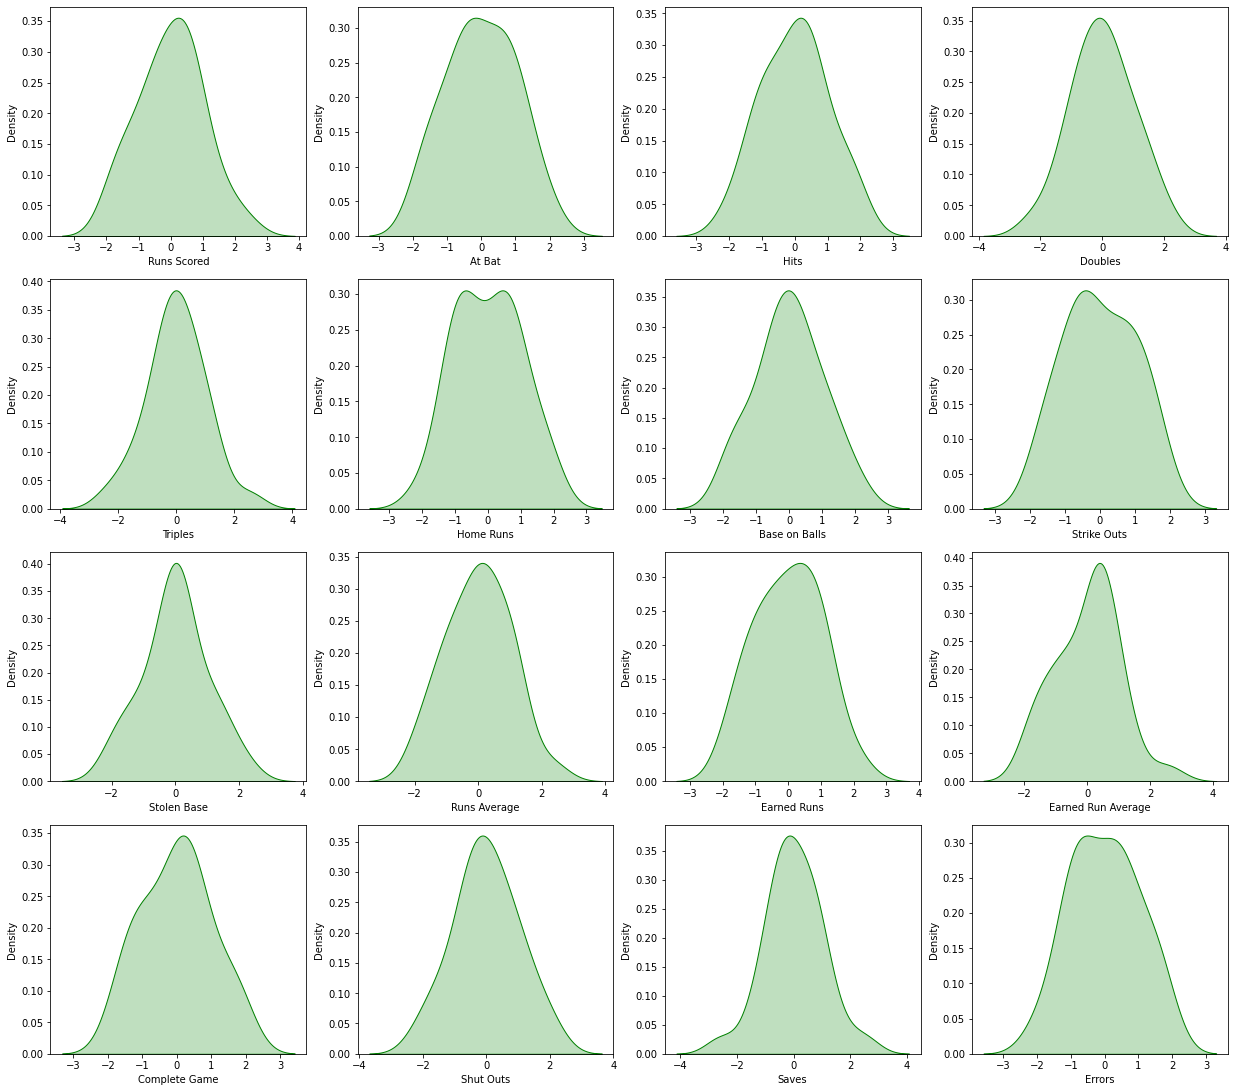

In [69]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(17,15))
index = 0
ax = ax.flatten()
for col, value in X.items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

<font size=3>As we can see in the above distribution plot all the values are being reflected in proper normalized formated showing a bell shape curve format.

<font size=5>**Finding best random state for building Regression Models**

In [70]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.9072531168436899 on Random State 896


<font size=5>**Creating the training and testing data sets**

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=896)

<font size=5>**Machine Learning Model for Regression with Evaluation Metrics**

In [72]:
def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=896)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)


<font size=3>I have built a function that splits the training and testing features and labels, then trains the model, predicts the label, calculates the RMSE score, generates the R2 score, calculates the Cross Validation score and finally finds the difference between the R2 score and Cross Validation score.

<font size=3>**LinearRegression Model**

In [73]:
model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 3.016511020974995
R2 Score is: 90.72531168436899
Cross Validation Score: 7.455055379642086
R2 Score - Cross Validation Score is 83.2702563047269


<font size=3>**Ridge Regression**

In [74]:
model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 2.4420218429381984
R2 Score is: 93.92160975300548
Cross Validation Score: 13.048930804952036
R2 Score - Cross Validation Score is 80.87267894805345


<font size=3> **Lasso Regression**
    

In [75]:
model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE Score is: 2.2949923417946274
R2 Score is: 94.63151217822356
Cross Validation Score: 17.369570939494665
R2 Score - Cross Validation Score is 77.2619412387289


<font size=3>**Decision Tree Regressor**

In [76]:
model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 7.905694150420948
R2 Score is: 36.29558846950151
Cross Validation Score: -242.26330820995946
R2 Score - Cross Validation Score is 278.558896679461


<font size=3>**Random Forest Regressor**

In [77]:
model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 10.67207379606867
R2 Score is: -16.087946853942903
Cross Validation Score: -21.449484136049914
R2 Score - Cross Validation Score is 5.361537282107012


<font size=3>**K Neighbors Regressor**

In [78]:
KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 9.802871578029716
R2 Score is: 2.0518771265816027
Cross Validation Score: -18.450305891208142
R2 Score - Cross Validation Score is 20.502183017789744


<font size=3>**Gradient Boosting Regressor**

In [79]:
model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 16.574619891176958
R2 Score is: -180.01200143920894
Cross Validation Score: -116.26947231799822
R2 Score - Cross Validation Score is -63.74252912121072


<font size=3>**Ada Boost Regressor**

In [80]:
model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 8.647615278213989
R2 Score is: 23.777671603758563
Cross Validation Score: -61.86353864626122
R2 Score - Cross Validation Score is 85.64121025001978


<font size=3>**Extra Trees Regressor**

In [81]:
model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 9.420965316781501
R2 Score is: 9.535059722885853
Cross Validation Score: 0.26044298948147304
R2 Score - Cross Validation Score is 9.274616733404379


<font size=3>**XGB Regressor**

In [82]:
model=XGBRegressor()
reg(model, X, Y)

RMSE Score is: 9.725680549989615
R2 Score is: 3.5883551796693225
Cross Validation Score: -41.19472586024888
R2 Score - Cross Validation Score is 44.7830810399182


<font size=5>**Hyper parameter tuning on the best ML Model**

In [83]:
fmod_param = {'fit_intercept' : [True, False],
              'normalize' : [True, False],
              'copy_X' : [True, False],
              'positive' : [True, False],
              'n_jobs' : [-2, -1, 1]
             }

In [84]:
GSCV = GridSearchCV(LinearRegression(), fmod_param, cv=5)

In [85]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-2, -1, 1],
                         'normalize': [True, False],
                         'positive': [True, False]})

In [86]:
GSCV.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': -2,
 'normalize': False,
 'positive': True}

In [87]:
Final_Model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs= -2, normalize=False, positive=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: -1.0685355883132899


<font size=5>**Saving the Model**

In [88]:
filename = "FinalModel_E01.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_E01.pkl']